# <center>**Distributed Optimization and Learning**</center>

### <center>Project 2: Distributed Optimization</center>

---


# <font color='#89A6FB'> Setup


> ## <font color='#EE4266'> Get access to project sources</font>


> > ### <font color='#EC994B'>Upload from local</font>


In [6]:
# @title

# from google.colab import files
# files.upload()


> > ### <font color='#EC994B'> Access to google drive </font>


In [7]:
# @title
from google.colab import drive
drive.mount('/content/drive/')
!ln -s /content/drive/MyDrive/Colab_Notebooks/DOL/HW3/ /content/
%cd ./HW3/src/


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
ln: failed to create symbolic link '/content/HW3': File exists
[Errno 2] No such file or directory: './HW3/src/'
/content/drive/MyDrive/Colab_Notebooks/DOL/HW3/src


> ## <font color='#EE4266'> Install and Import Libraries </font>


In [8]:
# @title
# !pip install -r requirements.txt


In [9]:
# @title
import matplotlib.pyplot as plt
from simulators import NoConsDecFedAvg,DecFedAvg,Centeralized,FedLCon,GossipLearning
from utils import DotDict, servers_plot
import pandas as pd
import torch
import copy
%load_ext autoreload
%autoreload 2
!mkdir results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
mkdir: cannot create directory ‘results’: File exists


# Initialization


In [18]:
def form_dict():
    # @markdown <font color="#EC994B">Number of communication rounds
    rounds = 10  # @param {type:"slider", min:1, max:50, step:1}
    # @markdown <font color="#EC994B">Number of users
    num_users = 6 # @param {type:"slider", min:1, max:50, step:1}
    # @markdown <font color="#EC994B">Number of local epochs for clients training
    local_ep = 4  # @param {type:"integer"}
    # @markdown <font color="#EC994B">Batch size of clients training
    local_bs = 128  # @param {type:"integer"}
    # @markdown <font color="#EC994B">Learning Rate
    lr = 0.01  # @param {type:"slider", min:0, max:1, step:0.1}
    # @markdown <font color="#EC994B">Communication topology
    topology = 'star'  # @param ["star","compelete", "circle","dynamic"] {type:"string"}
    # @markdown <font color="#EC994B">Weights mode
    mode = "double_stochastic" # @param ["double_stochastic","stochastic", "ones"] {type:"string"}
    # @markdown <font color="#EC994B">Architecture of Neural Network
    model = 'Model1'  # @param ["Model1", "Model3"] {type:"string"}
    # @markdown <font color="#EC994B">Dataset
    dataset = "mnist"  # @param ["mnist" ,"cifar10","fmnist"] {type:"string"}
    # @markdown <font color="#EC994B">Distribution of dataset
    iid = False  # @param ["True","False"] {type:"raw"}
    shards=2
    # @markdown <font color="#EC994B">seed
    seed = 2028 # @param {type:"number"}
    # @markdown <font color="#EC994B">optimizer
    optimizer = 'sgd'  # @param ["sgd","adam"] {type:"string"}
    # @markdown <font color="#EC994B">momentum
    momentum = 0.5  # @param {type:"slider", min:0, max:1, step:0.1}
    # @markdown <font color="#EC994B">verbose
    verbose = True  # @param ["True","False"] {type:"raw"}
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    return locals()

    # @markdown ---
args = DotDict(form_dict())

# <font color='#89A6FB'> Training


### Centralized

In [ ]:
centeral = Centeralized(args)
centeral.run(args.rounds)
pd.DataFrame(centeral.history).to_csv(f"./results/centeral_{args.dataset}_{args.rounds}_{args.num_users}.csv")



 | Download Dataset mnist |


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../data/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/mnist/MNIST/raw


 | Splitting Dataset |
| IID | # Imgs Per Client : 60000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    IID
    Dataset             : mnist
    Num of users        : 1
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 1
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 2028

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2,

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |

 | # 1 |


/content/utils.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image), torch.tensor(label)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


| Local Epoch :  1 | Train Loss: 1.960 | Train Acc: 62.18% | Val Loss: 1.663 | Val Acc: 82.07% |


 10%|█         | 1/10 [00:23<03:35, 23.98s/it]

| After  Local Update | Test Loss : 1.653 | Test ACC: 0.830 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.960
Test Loss : 1.653
Test ACC : 0.83

 | Local Training Round : 2 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.640 | Train Acc: 83.36% | Val Loss: 1.628 | Val Acc: 84.20% |


 20%|██        | 2/10 [00:41<02:41, 20.13s/it]

| After  Local Update | Test Loss : 1.622 | Test ACC: 0.847 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.640
Test Loss : 1.622
Test ACC : 0.85

 | Local Training Round : 3 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.619 | Train Acc: 84.87% | Val Loss: 1.612 | Val Acc: 85.42% |


 30%|███       | 3/10 [00:58<02:10, 18.60s/it]

| After  Local Update | Test Loss : 1.609 | Test ACC: 0.859 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.619
Test Loss : 1.609
Test ACC : 0.86

 | Local Training Round : 4 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.599 | Train Acc: 86.87% | Val Loss: 1.541 | Val Acc: 93.13% |


 40%|████      | 4/10 [01:14<01:47, 17.84s/it]

| After  Local Update | Test Loss : 1.539 | Test ACC: 0.933 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.599
Test Loss : 1.539
Test ACC : 0.93

 | Local Training Round : 5 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.532 | Train Acc: 93.92% | Val Loss: 1.525 | Val Acc: 94.33% |


 50%|█████     | 5/10 [01:31<01:27, 17.48s/it]

| After  Local Update | Test Loss : 1.523 | Test ACC: 0.945 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.532
Test Loss : 1.523
Test ACC : 0.94

 | Local Training Round : 6 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.518 | Train Acc: 94.99% | Val Loss: 1.515 | Val Acc: 95.23% |


 60%|██████    | 6/10 [01:48<01:08, 17.25s/it]

| After  Local Update | Test Loss : 1.510 | Test ACC: 0.958 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.518
Test Loss : 1.510
Test ACC : 0.96

 | Local Training Round : 7 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.510 | Train Acc: 95.72% | Val Loss: 1.506 | Val Acc: 96.07% |


 70%|███████   | 7/10 [02:05<00:51, 17.01s/it]

| After  Local Update | Test Loss : 1.503 | Test ACC: 0.963 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.510
Test Loss : 1.503
Test ACC : 0.96

 | Local Training Round : 8 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.504 | Train Acc: 96.29% | Val Loss: 1.502 | Val Acc: 96.47% |


 80%|████████  | 8/10 [02:21<00:33, 16.88s/it]

| After  Local Update | Test Loss : 1.498 | Test ACC: 0.969 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.504
Test Loss : 1.498
Test ACC : 0.97

 | Local Training Round : 9 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.499 | Train Acc: 96.75% | Val Loss: 1.499 | Val Acc: 96.82% |


 90%|█████████ | 9/10 [02:38<00:16, 16.89s/it]

| After  Local Update | Test Loss : 1.496 | Test ACC: 0.970 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.499
Test Loss : 1.496
Test ACC : 0.97

 | Local Training Round : 10 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.495 | Train Acc: 97.10% | Val Loss: 1.497 | Val Acc: 96.95% |


100%|██████████| 10/10 [02:55<00:00, 17.53s/it]

| After  Local Update | Test Loss : 1.494 | Test ACC: 0.971 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.495
Test Loss : 1.494
Test ACC : 0.97

 Total Run Time: 175.3367


### <font color='#EC994B'>Decentralized FedAverage without consensus</font>




#### iid

In [ ]:
args.iid = True
no_cons_dec_iid = NoConsDecFedAvg(args)
no_cons_dec_iid.run(args.rounds)
pd.DataFrame(no_cons_dec_iid.history).to_csv(f"./results/no_cons_iid{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| IID | # Imgs Per Client : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 2028

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)


  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 2.294 | Train Acc: 29.06% | Val Loss: 2.284 | Val Acc: 47.50% |
| Local Epoch :  2 | Train Loss: 2.256 | Train Acc: 53.53% | Val Loss: 2.206 | Val Acc: 47.80% |
| Local Epoch :  3 | Train Loss: 2.048 | Train Acc: 56.52% | Val Loss: 1.895 | Val Acc: 65.40% |
| Local Epoch :  4 | Train Loss: 1.794 | Train Acc: 74.81% | Val Loss: 1.723 | Val Acc: 79.50% |
| After  Local Update | Test Loss : 1.724 | Test ACC: 0.796 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 2.294 | Train Acc: 28.84% | Val Loss: 2.282 | Val Acc: 49.00% |
| Local Epoch :  2 | Train Loss: 2.251 | Train Acc: 42.47% | Val Loss: 2.196 | Val Acc: 46.50% |
| Local Epoch :  3 | Train Loss: 2.054 | Train Acc: 60.62% | Val Loss: 1.892 | Val Acc: 67.30% |
| Local Epoch :  4 | Train Loss: 1.792 | Train Acc: 74.17% | Val Loss: 1.744 | Val Acc: 77.80% |
| After  Local Update | Test Loss : 1.718 | Test ACC: 0.805 |
 | # 3 |
| Local Epoch :  1 | Train Loss: 2.294 | 

 10%|█         | 1/10 [01:10<10:33, 70.40s/it]

| After  Local Update | Test Loss : 1.738 | Test ACC: 0.768 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 2.096
Test Loss : 1.731
Test ACC : 0.78

 | Local Training Round : 2 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.700 | Train Acc: 80.60% | Val Loss: 1.658 | Val Acc: 84.50% |
| Local Epoch :  2 | Train Loss: 1.668 | Train Acc: 82.23% | Val Loss: 1.642 | Val Acc: 84.10% |
| Local Epoch :  3 | Train Loss: 1.653 | Train Acc: 82.78% | Val Loss: 1.638 | Val Acc: 83.60% |
| Local Epoch :  4 | Train Loss: 1.644 | Train Acc: 83.39% | Val Loss: 1.637 | Val Acc: 84.20% |
| After  Local Update | Test Loss : 1.650 | Test ACC: 0.826 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.701 | Train Acc: 80.44% | Val Loss: 1.701 | Val Acc: 79.10% |
| Local Epoch :  2 | Train Loss: 1.670 | Train Acc: 81.92% | Val Loss: 1.683 | Val Acc: 79.90% |
| Local Epoch :  3 | Train Loss: 1.654 | Train Acc: 82.96% | Val Loss: 1.672 | Val Acc: 81.00% |
| Local Epoch :  4 | Train Loss: 1.644 | Train 

 20%|██        | 2/10 [02:21<09:26, 70.78s/it]

| After  Local Update | Test Loss : 1.639 | Test ACC: 0.833 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.669
Test Loss : 1.639
Test ACC : 0.83

 | Local Training Round : 3 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.637 | Train Acc: 83.77% | Val Loss: 1.622 | Val Acc: 84.80% |
| Local Epoch :  2 | Train Loss: 1.631 | Train Acc: 84.12% | Val Loss: 1.619 | Val Acc: 85.10% |
| Local Epoch :  3 | Train Loss: 1.627 | Train Acc: 84.57% | Val Loss: 1.616 | Val Acc: 85.60% |
| Local Epoch :  4 | Train Loss: 1.624 | Train Acc: 84.74% | Val Loss: 1.616 | Val Acc: 85.00% |
| After  Local Update | Test Loss : 1.623 | Test ACC: 0.846 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.637 | Train Acc: 84.00% | Val Loss: 1.654 | Val Acc: 81.60% |
| Local Epoch :  2 | Train Loss: 1.632 | Train Acc: 84.18% | Val Loss: 1.648 | Val Acc: 82.60% |
| Local Epoch :  3 | Train Loss: 1.626 | Train Acc: 84.66% | Val Loss: 1.648 | Val Acc: 82.30% |
| Local Epoch :  4 | Train Loss: 1.623 | Train 

 30%|███       | 3/10 [03:32<08:14, 70.71s/it]

| After  Local Update | Test Loss : 1.626 | Test ACC: 0.846 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.631
Test Loss : 1.623
Test ACC : 0.85

 | Local Training Round : 4 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.621 | Train Acc: 85.16% | Val Loss: 1.617 | Val Acc: 85.00% |
| Local Epoch :  2 | Train Loss: 1.618 | Train Acc: 85.19% | Val Loss: 1.614 | Val Acc: 85.50% |
| Local Epoch :  3 | Train Loss: 1.616 | Train Acc: 85.42% | Val Loss: 1.608 | Val Acc: 85.70% |
| Local Epoch :  4 | Train Loss: 1.613 | Train Acc: 85.68% | Val Loss: 1.604 | Val Acc: 86.00% |
| After  Local Update | Test Loss : 1.613 | Test ACC: 0.854 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.619 | Train Acc: 85.28% | Val Loss: 1.635 | Val Acc: 83.30% |
| Local Epoch :  2 | Train Loss: 1.615 | Train Acc: 85.23% | Val Loss: 1.636 | Val Acc: 83.20% |
| Local Epoch :  3 | Train Loss: 1.614 | Train Acc: 85.58% | Val Loss: 1.634 | Val Acc: 83.30% |
| Local Epoch :  4 | Train Loss: 1.611 | Train 

 40%|████      | 4/10 [04:42<07:04, 70.70s/it]

| After  Local Update | Test Loss : 1.619 | Test ACC: 0.848 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.616
Test Loss : 1.607
Test ACC : 0.86

 | Local Training Round : 5 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.610 | Train Acc: 85.76% | Val Loss: 1.602 | Val Acc: 86.40% |
| Local Epoch :  2 | Train Loss: 1.608 | Train Acc: 85.93% | Val Loss: 1.605 | Val Acc: 86.30% |
| Local Epoch :  3 | Train Loss: 1.607 | Train Acc: 86.17% | Val Loss: 1.601 | Val Acc: 86.70% |
| Local Epoch :  4 | Train Loss: 1.605 | Train Acc: 86.22% | Val Loss: 1.600 | Val Acc: 86.30% |
| After  Local Update | Test Loss : 1.608 | Test ACC: 0.858 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.609 | Train Acc: 86.03% | Val Loss: 1.632 | Val Acc: 83.60% |
| Local Epoch :  2 | Train Loss: 1.607 | Train Acc: 86.13% | Val Loss: 1.629 | Val Acc: 83.70% |
| Local Epoch :  3 | Train Loss: 1.604 | Train Acc: 86.36% | Val Loss: 1.626 | Val Acc: 83.40% |
| Local Epoch :  4 | Train Loss: 1.603 | Train 

 50%|█████     | 5/10 [05:54<05:54, 70.94s/it]

| After  Local Update | Test Loss : 1.608 | Test ACC: 0.858 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.597
Test Loss : 1.596
Test ACC : 0.87

 | Local Training Round : 6 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.604 | Train Acc: 86.28% | Val Loss: 1.598 | Val Acc: 86.40% |
| Local Epoch :  2 | Train Loss: 1.601 | Train Acc: 86.38% | Val Loss: 1.596 | Val Acc: 86.50% |
| Local Epoch :  3 | Train Loss: 1.600 | Train Acc: 86.64% | Val Loss: 1.596 | Val Acc: 87.00% |
| Local Epoch :  4 | Train Loss: 1.599 | Train Acc: 86.81% | Val Loss: 1.598 | Val Acc: 86.50% |
| After  Local Update | Test Loss : 1.608 | Test ACC: 0.860 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.601 | Train Acc: 86.60% | Val Loss: 1.622 | Val Acc: 84.20% |
| Local Epoch :  2 | Train Loss: 1.599 | Train Acc: 86.72% | Val Loss: 1.623 | Val Acc: 84.60% |
| Local Epoch :  3 | Train Loss: 1.598 | Train Acc: 86.94% | Val Loss: 1.619 | Val Acc: 84.90% |
| Local Epoch :  4 | Train Loss: 1.597 | Train 

 60%|██████    | 6/10 [07:03<04:42, 70.53s/it]

| After  Local Update | Test Loss : 1.603 | Test ACC: 0.862 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.589
Test Loss : 1.592
Test ACC : 0.87

 | Local Training Round : 7 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.598 | Train Acc: 86.91% | Val Loss: 1.593 | Val Acc: 87.00% |
| Local Epoch :  2 | Train Loss: 1.596 | Train Acc: 86.98% | Val Loss: 1.592 | Val Acc: 87.20% |
| Local Epoch :  3 | Train Loss: 1.596 | Train Acc: 87.08% | Val Loss: 1.589 | Val Acc: 87.50% |
| Local Epoch :  4 | Train Loss: 1.589 | Train Acc: 87.79% | Val Loss: 1.562 | Val Acc: 90.10% |
| After  Local Update | Test Loss : 1.571 | Test ACC: 0.898 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.596 | Train Acc: 87.13% | Val Loss: 1.619 | Val Acc: 84.90% |
| Local Epoch :  2 | Train Loss: 1.593 | Train Acc: 87.33% | Val Loss: 1.618 | Val Acc: 84.80% |
| Local Epoch :  3 | Train Loss: 1.593 | Train Acc: 87.37% | Val Loss: 1.618 | Val Acc: 84.70% |
| Local Epoch :  4 | Train Loss: 1.592 | Train 

 70%|███████   | 7/10 [08:14<03:31, 70.53s/it]

| After  Local Update | Test Loss : 1.543 | Test ACC: 0.930 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.581
Test Loss : 1.572
Test ACC : 0.90

 | Local Training Round : 8 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.543 | Train Acc: 93.01% | Val Loss: 1.526 | Val Acc: 94.50% |
| Local Epoch :  2 | Train Loss: 1.528 | Train Acc: 94.37% | Val Loss: 1.523 | Val Acc: 94.60% |
| Local Epoch :  3 | Train Loss: 1.524 | Train Acc: 94.62% | Val Loss: 1.522 | Val Acc: 94.80% |
| Local Epoch :  4 | Train Loss: 1.521 | Train Acc: 95.04% | Val Loss: 1.518 | Val Acc: 94.70% |
| After  Local Update | Test Loss : 1.524 | Test ACC: 0.945 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.591 | Train Acc: 87.51% | Val Loss: 1.614 | Val Acc: 84.70% |
| Local Epoch :  2 | Train Loss: 1.590 | Train Acc: 87.70% | Val Loss: 1.621 | Val Acc: 84.20% |
| Local Epoch :  3 | Train Loss: 1.590 | Train Acc: 87.67% | Val Loss: 1.615 | Val Acc: 85.00% |
| Local Epoch :  4 | Train Loss: 1.588 | Train 

 80%|████████  | 8/10 [09:25<02:21, 70.68s/it]

| After  Local Update | Test Loss : 1.524 | Test ACC: 0.945 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.551
Test Loss : 1.549
Test ACC : 0.92

 | Local Training Round : 9 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.518 | Train Acc: 95.29% | Val Loss: 1.514 | Val Acc: 95.30% |
| Local Epoch :  2 | Train Loss: 1.516 | Train Acc: 95.54% | Val Loss: 1.513 | Val Acc: 95.50% |
| Local Epoch :  3 | Train Loss: 1.514 | Train Acc: 95.58% | Val Loss: 1.512 | Val Acc: 96.00% |
| Local Epoch :  4 | Train Loss: 1.511 | Train Acc: 95.74% | Val Loss: 1.509 | Val Acc: 95.60% |
| After  Local Update | Test Loss : 1.518 | Test ACC: 0.951 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.586 | Train Acc: 88.00% | Val Loss: 1.612 | Val Acc: 85.10% |
| Local Epoch :  2 | Train Loss: 1.587 | Train Acc: 87.88% | Val Loss: 1.611 | Val Acc: 85.30% |
| Local Epoch :  3 | Train Loss: 1.586 | Train Acc: 87.94% | Val Loss: 1.611 | Val Acc: 85.50% |
| Local Epoch :  4 | Train Loss: 1.584 | Train 

 90%|█████████ | 9/10 [10:35<01:10, 70.64s/it]

| After  Local Update | Test Loss : 1.514 | Test ACC: 0.953 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.538
Test Loss : 1.541
Test ACC : 0.93

 | Local Training Round : 10 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.510 | Train Acc: 95.92% | Val Loss: 1.505 | Val Acc: 96.10% |
| Local Epoch :  2 | Train Loss: 1.508 | Train Acc: 96.16% | Val Loss: 1.505 | Val Acc: 96.30% |
| Local Epoch :  3 | Train Loss: 1.507 | Train Acc: 96.19% | Val Loss: 1.508 | Val Acc: 95.40% |
| Local Epoch :  4 | Train Loss: 1.505 | Train Acc: 96.43% | Val Loss: 1.504 | Val Acc: 96.00% |
| After  Local Update | Test Loss : 1.512 | Test ACC: 0.953 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.584 | Train Acc: 88.21% | Val Loss: 1.610 | Val Acc: 85.10% |
| Local Epoch :  2 | Train Loss: 1.582 | Train Acc: 88.18% | Val Loss: 1.617 | Val Acc: 84.60% |
| Local Epoch :  3 | Train Loss: 1.584 | Train Acc: 88.23% | Val Loss: 1.610 | Val Acc: 85.10% |
| Local Epoch :  4 | Train Loss: 1.580 | Train

100%|██████████| 10/10 [11:46<00:00, 70.60s/it]

| After  Local Update | Test Loss : 1.510 | Test ACC: 0.956 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.532
Test Loss : 1.538
Test ACC : 0.93

 Total Run Time: 706.0546


#### non_iid

In [ ]:
args.iid = False
no_cons_dec_non_iid = NoConsDecFedAvg(args)
no_cons_dec_non_iid.run(args.rounds)
pd.DataFrame(no_cons_dec_non_iid.history).to_csv(f"./results/no_cons_iid{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 2028

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.960 | Train Acc: 57.93% | Val Loss: 1.696 | Val Acc: 79.20% |
| Local Epoch :  2 | Train Loss: 1.693 | Train Acc: 78.28% | Val Loss: 1.673 | Val Acc: 80.10% |
| Local Epoch :  3 | Train Loss: 1.681 | Train Acc: 78.78% | Val Loss: 1.663 | Val Acc: 80.30% |
| Local Epoch :  4 | Train Loss: 1.674 | Train Acc: 79.28% | Val Loss: 1.660 | Val Acc: 80.70% |
| After  Local Update | Test Loss : 2.252 | Test ACC: 0.208 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.893 | Train Acc: 73.72% | Val Loss: 1.609 | Val Acc: 91.80% |
| Local Epoch :  2 | Train Loss: 1.550 | Train Acc: 95.23% | Val Loss: 1.524 | Val Acc: 95.70% |
| Local Epoch :  3 | Train Loss: 1.512 | Train Acc: 96.57% | Val Loss: 1.507 | Val Acc: 96.90% |
| Local Epoch :  4 | Train Loss: 1.502 | Train Acc: 97.14% | Val Loss: 1.502 | Val Acc: 96.70% |
| After  Local Update | Test Loss : 2.266 | Test ACC: 0.193 |
 | # 3 |
| Local Epoch :  1 | Train Loss: 1.978 | 

 10%|█         | 1/10 [01:10<10:35, 70.66s/it]

| After  Local Update | Test Loss : 2.262 | Test ACC: 0.191 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.714
Test Loss : 2.224
Test ACC : 0.23

 | Local Training Round : 2 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.670 | Train Acc: 79.50% | Val Loss: 1.658 | Val Acc: 81.00% |
| Local Epoch :  2 | Train Loss: 1.668 | Train Acc: 79.67% | Val Loss: 1.653 | Val Acc: 81.50% |
| Local Epoch :  3 | Train Loss: 1.667 | Train Acc: 79.90% | Val Loss: 1.652 | Val Acc: 81.40% |
| Local Epoch :  4 | Train Loss: 1.665 | Train Acc: 80.04% | Val Loss: 1.649 | Val Acc: 81.80% |
| After  Local Update | Test Loss : 2.250 | Test ACC: 0.209 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.497 | Train Acc: 97.30% | Val Loss: 1.498 | Val Acc: 97.10% |
| Local Epoch :  2 | Train Loss: 1.493 | Train Acc: 97.57% | Val Loss: 1.491 | Val Acc: 97.80% |
| Local Epoch :  3 | Train Loss: 1.489 | Train Acc: 97.77% | Val Loss: 1.490 | Val Acc: 97.90% |
| Local Epoch :  4 | Train Loss: 1.488 | Train 

 20%|██        | 2/10 [02:20<09:20, 70.03s/it]

| After  Local Update | Test Loss : 2.260 | Test ACC: 0.192 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.597
Test Loss : 2.222
Test ACC : 0.23

 | Local Training Round : 3 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.662 | Train Acc: 80.13% | Val Loss: 1.651 | Val Acc: 81.40% |
| Local Epoch :  2 | Train Loss: 1.662 | Train Acc: 80.24% | Val Loss: 1.647 | Val Acc: 81.40% |
| Local Epoch :  3 | Train Loss: 1.661 | Train Acc: 80.30% | Val Loss: 1.646 | Val Acc: 81.80% |
| Local Epoch :  4 | Train Loss: 1.661 | Train Acc: 80.34% | Val Loss: 1.644 | Val Acc: 82.30% |
| After  Local Update | Test Loss : 2.250 | Test ACC: 0.209 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.486 | Train Acc: 97.98% | Val Loss: 1.484 | Val Acc: 98.20% |
| Local Epoch :  2 | Train Loss: 1.485 | Train Acc: 98.07% | Val Loss: 1.484 | Val Acc: 98.40% |
| Local Epoch :  3 | Train Loss: 1.483 | Train Acc: 98.17% | Val Loss: 1.483 | Val Acc: 98.20% |
| Local Epoch :  4 | Train Loss: 1.482 | Train 

 30%|███       | 3/10 [03:29<08:06, 69.54s/it]

| After  Local Update | Test Loss : 2.259 | Test ACC: 0.192 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.591
Test Loss : 2.222
Test ACC : 0.23

 | Local Training Round : 4 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.660 | Train Acc: 80.42% | Val Loss: 1.645 | Val Acc: 82.00% |
| Local Epoch :  2 | Train Loss: 1.658 | Train Acc: 80.43% | Val Loss: 1.642 | Val Acc: 82.20% |
| Local Epoch :  3 | Train Loss: 1.659 | Train Acc: 80.51% | Val Loss: 1.643 | Val Acc: 82.20% |
| Local Epoch :  4 | Train Loss: 1.658 | Train Acc: 80.44% | Val Loss: 1.641 | Val Acc: 82.20% |
| After  Local Update | Test Loss : 2.249 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.481 | Train Acc: 98.38% | Val Loss: 1.481 | Val Acc: 98.60% |
| Local Epoch :  2 | Train Loss: 1.480 | Train Acc: 98.53% | Val Loss: 1.478 | Val Acc: 98.70% |
| Local Epoch :  3 | Train Loss: 1.479 | Train Acc: 98.57% | Val Loss: 1.478 | Val Acc: 98.70% |
| Local Epoch :  4 | Train Loss: 1.479 | Train 

 40%|████      | 4/10 [04:38<06:56, 69.36s/it]

| After  Local Update | Test Loss : 2.262 | Test ACC: 0.192 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.588
Test Loss : 2.222
Test ACC : 0.23

 | Local Training Round : 5 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.658 | Train Acc: 80.48% | Val Loss: 1.643 | Val Acc: 82.20% |
| Local Epoch :  2 | Train Loss: 1.657 | Train Acc: 80.53% | Val Loss: 1.640 | Val Acc: 82.30% |
| Local Epoch :  3 | Train Loss: 1.657 | Train Acc: 80.56% | Val Loss: 1.641 | Val Acc: 82.20% |
| Local Epoch :  4 | Train Loss: 1.657 | Train Acc: 80.57% | Val Loss: 1.642 | Val Acc: 82.20% |
| After  Local Update | Test Loss : 2.249 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.478 | Train Acc: 98.69% | Val Loss: 1.481 | Val Acc: 98.50% |
| Local Epoch :  2 | Train Loss: 1.477 | Train Acc: 98.77% | Val Loss: 1.476 | Val Acc: 98.90% |
| Local Epoch :  3 | Train Loss: 1.477 | Train Acc: 98.80% | Val Loss: 1.476 | Val Acc: 99.00% |
| Local Epoch :  4 | Train Loss: 1.476 | Train 

 50%|█████     | 5/10 [05:47<05:46, 69.24s/it]

| After  Local Update | Test Loss : 2.261 | Test ACC: 0.192 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.586
Test Loss : 2.222
Test ACC : 0.23

 | Local Training Round : 6 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.657 | Train Acc: 80.63% | Val Loss: 1.639 | Val Acc: 82.30% |
| Local Epoch :  2 | Train Loss: 1.656 | Train Acc: 80.59% | Val Loss: 1.641 | Val Acc: 82.30% |
| Local Epoch :  3 | Train Loss: 1.656 | Train Acc: 80.62% | Val Loss: 1.641 | Val Acc: 82.20% |
| Local Epoch :  4 | Train Loss: 1.656 | Train Acc: 80.60% | Val Loss: 1.641 | Val Acc: 82.20% |
| After  Local Update | Test Loss : 2.250 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.476 | Train Acc: 98.88% | Val Loss: 1.476 | Val Acc: 98.90% |
| Local Epoch :  2 | Train Loss: 1.475 | Train Acc: 98.90% | Val Loss: 1.474 | Val Acc: 98.90% |
| Local Epoch :  3 | Train Loss: 1.475 | Train Acc: 98.92% | Val Loss: 1.475 | Val Acc: 99.00% |
| Local Epoch :  4 | Train Loss: 1.475 | Train 

 60%|██████    | 6/10 [06:56<04:37, 69.32s/it]

| After  Local Update | Test Loss : 2.261 | Test ACC: 0.192 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.585
Test Loss : 2.221
Test ACC : 0.23

 | Local Training Round : 7 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.656 | Train Acc: 80.72% | Val Loss: 1.640 | Val Acc: 82.30% |
| Local Epoch :  2 | Train Loss: 1.656 | Train Acc: 80.66% | Val Loss: 1.641 | Val Acc: 82.40% |
| Local Epoch :  3 | Train Loss: 1.655 | Train Acc: 80.66% | Val Loss: 1.641 | Val Acc: 82.20% |
| Local Epoch :  4 | Train Loss: 1.654 | Train Acc: 80.69% | Val Loss: 1.640 | Val Acc: 82.40% |
| After  Local Update | Test Loss : 2.250 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.474 | Train Acc: 99.04% | Val Loss: 1.473 | Val Acc: 99.00% |
| Local Epoch :  2 | Train Loss: 1.474 | Train Acc: 99.00% | Val Loss: 1.473 | Val Acc: 99.10% |
| Local Epoch :  3 | Train Loss: 1.474 | Train Acc: 99.09% | Val Loss: 1.473 | Val Acc: 99.00% |
| Local Epoch :  4 | Train Loss: 1.473 | Train 

 70%|███████   | 7/10 [08:06<03:28, 69.37s/it]

| After  Local Update | Test Loss : 2.262 | Test ACC: 0.192 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.584
Test Loss : 2.222
Test ACC : 0.23

 | Local Training Round : 8 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.655 | Train Acc: 80.74% | Val Loss: 1.639 | Val Acc: 82.20% |
| Local Epoch :  2 | Train Loss: 1.655 | Train Acc: 80.73% | Val Loss: 1.642 | Val Acc: 82.30% |
| Local Epoch :  3 | Train Loss: 1.656 | Train Acc: 80.70% | Val Loss: 1.640 | Val Acc: 82.40% |
| Local Epoch :  4 | Train Loss: 1.655 | Train Acc: 80.71% | Val Loss: 1.638 | Val Acc: 82.40% |
| After  Local Update | Test Loss : 2.248 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.473 | Train Acc: 99.12% | Val Loss: 1.472 | Val Acc: 99.20% |
| Local Epoch :  2 | Train Loss: 1.473 | Train Acc: 99.11% | Val Loss: 1.472 | Val Acc: 99.10% |
| Local Epoch :  3 | Train Loss: 1.472 | Train Acc: 99.09% | Val Loss: 1.474 | Val Acc: 99.00% |
| Local Epoch :  4 | Train Loss: 1.472 | Train 

 80%|████████  | 8/10 [09:15<02:18, 69.26s/it]

| After  Local Update | Test Loss : 2.262 | Test ACC: 0.192 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.583
Test Loss : 2.221
Test ACC : 0.23

 | Local Training Round : 9 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.655 | Train Acc: 80.73% | Val Loss: 1.638 | Val Acc: 82.40% |
| Local Epoch :  2 | Train Loss: 1.654 | Train Acc: 80.73% | Val Loss: 1.639 | Val Acc: 82.40% |
| Local Epoch :  3 | Train Loss: 1.655 | Train Acc: 80.73% | Val Loss: 1.639 | Val Acc: 82.30% |
| Local Epoch :  4 | Train Loss: 1.655 | Train Acc: 80.74% | Val Loss: 1.639 | Val Acc: 82.40% |
| After  Local Update | Test Loss : 2.248 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.472 | Train Acc: 99.17% | Val Loss: 1.471 | Val Acc: 99.20% |
| Local Epoch :  2 | Train Loss: 1.471 | Train Acc: 99.22% | Val Loss: 1.471 | Val Acc: 99.30% |
| Local Epoch :  3 | Train Loss: 1.471 | Train Acc: 99.28% | Val Loss: 1.475 | Val Acc: 98.90% |
| Local Epoch :  4 | Train Loss: 1.471 | Train 

 90%|█████████ | 9/10 [10:24<01:09, 69.26s/it]

| After  Local Update | Test Loss : 2.263 | Test ACC: 0.192 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.583
Test Loss : 2.221
Test ACC : 0.23

 | Local Training Round : 10 |

 | # 1 |
| Local Epoch :  1 | Train Loss: 1.654 | Train Acc: 80.72% | Val Loss: 1.638 | Val Acc: 82.40% |
| Local Epoch :  2 | Train Loss: 1.655 | Train Acc: 80.74% | Val Loss: 1.638 | Val Acc: 82.40% |
| Local Epoch :  3 | Train Loss: 1.654 | Train Acc: 80.72% | Val Loss: 1.638 | Val Acc: 82.40% |
| Local Epoch :  4 | Train Loss: 1.654 | Train Acc: 80.78% | Val Loss: 1.639 | Val Acc: 82.50% |
| After  Local Update | Test Loss : 2.248 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.471 | Train Acc: 99.29% | Val Loss: 1.470 | Val Acc: 99.30% |
| Local Epoch :  2 | Train Loss: 1.471 | Train Acc: 99.28% | Val Loss: 1.470 | Val Acc: 99.40% |
| Local Epoch :  3 | Train Loss: 1.470 | Train Acc: 99.30% | Val Loss: 1.471 | Val Acc: 99.20% |
| Local Epoch :  4 | Train Loss: 1.470 | Train

100%|██████████| 10/10 [11:33<00:00, 69.39s/it]

| After  Local Update | Test Loss : 2.261 | Test ACC: 0.192 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.582
Test Loss : 2.221
Test ACC : 0.23

 Total Run Time: 693.9380


### <font color='#EC994B'>Decentralized FedAverage with consensus</font>


#### Stocahstic

##### Star

In [ ]:
args.iid = False
args.topology = 'star'
args.mode = 'stochastic'
dec_fed_avg_star_stoch_noniid = DecFedAvg(args)
dec_fed_avg_star_stoch_noniid.run(args.rounds)
pd.DataFrame(dec_fed_avg_star_stoch_noniid.history).to_csv(f"./results/dec_fed_avg_{args.topology}_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2025
random seed = 2025

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.863 | Train Acc: 74.66% | Val Loss: 1.600 | Val Acc: 88.90% |
| Local Epoch :  2 | Train Loss: 1.585 | Train Acc: 89.23% | Val Loss: 1.580 | Val Acc: 89.40% |
| Local Epoch :  3 | Train Loss: 1.576 | Train Acc: 89.36% | Val Loss: 1.573 | Val Acc: 89.40% |
| Local Epoch :  4 | Train Loss: 1.571 | Train Acc: 89.47% | Val Loss: 1.570 | Val Acc: 89.30% |
| Afte

 10%|█         | 1/10 [01:20<12:04, 80.47s/it]

| After  Local Update | Test Loss : 2.245 | Test ACC: 0.208 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.681
Test Loss : 2.303
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.230 | Test ACC: 0.242 |
| Before Local Update | Test Loss : 2.259 | Test ACC: 0.193 |
| Before Local Update | Test Loss : 2.264 | Test ACC: 0.193 |
| Before Local Update | Test Loss : 2.263 | Test ACC: 0.193 |
| Before Local Update | Test Loss : 2.261 | Test ACC: 0.193 |
| Before Local Update | Test Loss : 2.263 | Test ACC: 0.193 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.953 | Train Acc: 51.82% | Val Loss: 1.595 | Val Acc: 88.50% |
| Local Epoch :  2 | Train Loss: 1.582 | Train Acc: 89.18% | Val Loss: 1.577 | Val Acc: 89.30% |
| Local Epoch :  3 | Train Loss: 1.573

 20%|██        | 2/10 [02:40<10:41, 80.18s/it]

| After  Local Update | Test Loss : 2.247 | Test ACC: 0.203 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 2.186
Test Loss : 2.257
Test ACC : 0.20

 | Local Training Round : 3 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.216 | Test ACC: 0.262 |
| Before Local Update | Test Loss : 2.261 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.261 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.194 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.574 | Train Acc: 89.56% | Val Loss: 1.571 | Val Acc: 89.70% |
| Local Epoch :  2 | Train Loss: 1.568 | Train Acc: 89.67% | Val Loss: 1.569 | Val Acc: 89.60% |
| Local Epoch :  3 | Train Loss: 1.568

 30%|███       | 3/10 [04:01<09:23, 80.51s/it]

| After  Local Update | Test Loss : 2.236 | Test ACC: 0.210 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.866
Test Loss : 2.254
Test ACC : 0.20

 | Local Training Round : 4 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.021 | Test ACC: 0.448 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.257 | Test ACC: 0.194 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.194 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.576 | Train Acc: 89.17% | Val Loss: 1.569 | Val Acc: 89.60% |
| Local Epoch :  2 | Train Loss: 1.567 | Train Acc: 89.70% | Val Loss: 1.567 | Val Acc: 89.50% |
| Local Epoch :  3 | Train Loss: 1.566

 40%|████      | 4/10 [05:21<08:01, 80.22s/it]

| After  Local Update | Test Loss : 2.243 | Test ACC: 0.206 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 2.090
Test Loss : 2.218
Test ACC : 0.24

 | Local Training Round : 5 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.151 | Test ACC: 0.299 |
| Before Local Update | Test Loss : 2.243 | Test ACC: 0.203 |
| Before Local Update | Test Loss : 2.242 | Test ACC: 0.203 |
| Before Local Update | Test Loss : 2.241 | Test ACC: 0.203 |
| Before Local Update | Test Loss : 2.244 | Test ACC: 0.203 |
| Before Local Update | Test Loss : 2.244 | Test ACC: 0.203 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.571 | Train Acc: 89.68% | Val Loss: 1.565 | Val Acc: 89.90% |
| Local Epoch :  2 | Train Loss: 1.566 | Train Acc: 89.87% | Val Loss: 1.565 | Val Acc: 89.90% |
| Local Epoch :  3 | Train Loss: 1.565

 50%|█████     | 5/10 [06:42<06:42, 80.47s/it]

| After  Local Update | Test Loss : 2.224 | Test ACC: 0.219 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.741
Test Loss : 2.227
Test ACC : 0.22

 | Local Training Round : 6 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 1.947 | Test ACC: 0.526 |
| Before Local Update | Test Loss : 2.254 | Test ACC: 0.196 |
| Before Local Update | Test Loss : 2.254 | Test ACC: 0.196 |
| Before Local Update | Test Loss : 2.254 | Test ACC: 0.196 |
| Before Local Update | Test Loss : 2.254 | Test ACC: 0.196 |
| Before Local Update | Test Loss : 2.254 | Test ACC: 0.196 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.571 | Train Acc: 89.31% | Val Loss: 1.565 | Val Acc: 90.00% |
| Local Epoch :  2 | Train Loss: 1.564 | Train Acc: 89.84% | Val Loss: 1.564 | Val Acc: 90.00% |
| Local Epoch :  3 | Train Loss: 1.565

 60%|██████    | 6/10 [08:03<05:23, 80.77s/it]

| After  Local Update | Test Loss : 2.233 | Test ACC: 0.213 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.926
Test Loss : 2.203
Test ACC : 0.25

 | Local Training Round : 7 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.048 | Test ACC: 0.438 |
| Before Local Update | Test Loss : 2.206 | Test ACC: 0.245 |
| Before Local Update | Test Loss : 2.207 | Test ACC: 0.245 |
| Before Local Update | Test Loss : 2.207 | Test ACC: 0.245 |
| Before Local Update | Test Loss : 2.207 | Test ACC: 0.245 |
| Before Local Update | Test Loss : 2.207 | Test ACC: 0.245 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.571 | Train Acc: 89.52% | Val Loss: 1.563 | Val Acc: 90.10% |
| Local Epoch :  2 | Train Loss: 1.564 | Train Acc: 89.98% | Val Loss: 1.564 | Val Acc: 90.00% |
| Local Epoch :  3 | Train Loss: 1.563

 70%|███████   | 7/10 [09:23<04:02, 80.71s/it]

| After  Local Update | Test Loss : 2.190 | Test ACC: 0.255 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.718
Test Loss : 2.180
Test ACC : 0.28

 | Local Training Round : 8 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 1.927 | Test ACC: 0.538 |
| Before Local Update | Test Loss : 2.238 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.237 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.235 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.236 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.237 | Test ACC: 0.210 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.570 | Train Acc: 89.46% | Val Loss: 1.563 | Val Acc: 90.00% |
| Local Epoch :  2 | Train Loss: 1.563 | Train Acc: 89.93% | Val Loss: 1.561 | Val Acc: 90.20% |
| Local Epoch :  3 | Train Loss: 1.563

 80%|████████  | 8/10 [10:44<02:41, 80.60s/it]

| After  Local Update | Test Loss : 2.218 | Test ACC: 0.223 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.863
Test Loss : 2.185
Test ACC : 0.26

 | Local Training Round : 9 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.017 | Test ACC: 0.455 |
| Before Local Update | Test Loss : 2.176 | Test ACC: 0.276 |
| Before Local Update | Test Loss : 2.177 | Test ACC: 0.276 |
| Before Local Update | Test Loss : 2.178 | Test ACC: 0.276 |
| Before Local Update | Test Loss : 2.176 | Test ACC: 0.276 |
| Before Local Update | Test Loss : 2.177 | Test ACC: 0.276 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.569 | Train Acc: 89.61% | Val Loss: 1.561 | Val Acc: 90.10% |
| Local Epoch :  2 | Train Loss: 1.562 | Train Acc: 90.03% | Val Loss: 1.562 | Val Acc: 90.20% |
| Local Epoch :  3 | Train Loss: 1.562

 90%|█████████ | 9/10 [12:04<01:20, 80.31s/it]

| After  Local Update | Test Loss : 2.038 | Test ACC: 0.409 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.693
Test Loss : 2.150
Test ACC : 0.31

 | Local Training Round : 10 |


 | Communication Graph
[0.         0.09374443 0.32358232 0.15057646 0.02555792 0.40653878]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 1.907 | Test ACC: 0.547 |
| Before Local Update | Test Loss : 2.210 | Test ACC: 0.238 |
| Before Local Update | Test Loss : 2.213 | Test ACC: 0.238 |
| Before Local Update | Test Loss : 2.214 | Test ACC: 0.238 |
| Before Local Update | Test Loss : 2.213 | Test ACC: 0.238 |
| Before Local Update | Test Loss : 2.213 | Test ACC: 0.238 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.570 | Train Acc: 89.30% | Val Loss: 1.561 | Val Acc: 90.10% |
| Local Epoch :  2 | Train Loss: 1.561 | Train Acc: 90.03% | Val Loss: 1.562 | Val Acc: 90.10% |
| Local Epoch :  3 | Train Loss: 1.56

100%|██████████| 10/10 [13:24<00:00, 80.47s/it]

| After  Local Update | Test Loss : 2.191 | Test ACC: 0.250 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.813
Test Loss : 2.162
Test ACC : 0.29

 Total Run Time: 804.7168


##### Circle

In [ ]:
args.iid = False
args.topology = 'circle'
args.mode = 'stochastic'
dec_fed_avg_circle_stoch_noniid = DecFedAvg(args)
dec_fed_avg_circle_stoch_noniid.run(args.rounds)
pd.DataFrame(dec_fed_avg_circle_stoch_noniid.history).to_csv(f"./results/dec_fed_avg_{args.topology}_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2025
random seed = 2025

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.097 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.863 | Train Acc: 74.66% | Val Loss: 1.600 | Val Acc: 88.90% |
| Local Epoch :  2 | Train Loss: 1.585 | Train Acc: 89.23% | Va

 10%|█         | 1/10 [01:19<11:58, 79.78s/it]

| After  Local Update | Test Loss : 2.245 | Test ACC: 0.208 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.681
Test Loss : 2.303
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.246 | Test ACC: 0.206 |
| Before Local Update | Test Loss : 2.254 | Test ACC: 0.193 |
| Before Local Update | Test Loss : 2.230 | Test ACC: 0.220 |
| Before Local Update | Test Loss : 2.242 | Test ACC: 0.187 |
| Before Local Update | Test Loss : 2.243 | Test ACC: 0.208 |
| Before Local Update | Test Loss : 2.227 | Test ACC: 0.213 |
 | # 1 

 20%|██        | 2/10 [02:39<10:38, 79.83s/it]

| After  Local Update | Test Loss : 2.163 | Test ACC: 0.289 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.940
Test Loss : 2.240
Test ACC : 0.20

 | Local Training Round : 3 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.166 | Test ACC: 0.283 |
| Before Local Update | Test Loss : 2.329 | Test ACC: 0.108 |
| Before Local Update | Test Loss : 2.090 | Test ACC: 0.392 |
| Before Local Update | Test Loss : 2.294 | Test ACC: 0.124 |
| Before Local Update | Test Loss : 2.161 | Test ACC: 0.290 |
| Before Local Update | Test Loss : 2.267 | Test ACC: 0.173 |
 | # 1 

 30%|███       | 3/10 [03:59<09:19, 79.96s/it]

| After  Local Update | Test Loss : 2.162 | Test ACC: 0.290 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.598
Test Loss : 2.218
Test ACC : 0.23

 | Local Training Round : 4 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.165 | Test ACC: 0.286 |
| Before Local Update | Test Loss : 2.206 | Test ACC: 0.238 |
| Before Local Update | Test Loss : 2.171 | Test ACC: 0.284 |
| Before Local Update | Test Loss : 2.112 | Test ACC: 0.334 |
| Before Local Update | Test Loss : 2.161 | Test ACC: 0.291 |
| Before Local Update | Test Loss : 2.089 | Test ACC: 0.395 |
 | # 1 

 40%|████      | 4/10 [05:22<08:05, 80.97s/it]

| After  Local Update | Test Loss : 2.150 | Test ACC: 0.294 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.706
Test Loss : 2.151
Test ACC : 0.30

 | Local Training Round : 5 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.144 | Test ACC: 0.299 |
| Before Local Update | Test Loss : 2.263 | Test ACC: 0.189 |
| Before Local Update | Test Loss : 2.033 | Test ACC: 0.412 |
| Before Local Update | Test Loss : 2.068 | Test ACC: 0.382 |
| Before Local Update | Test Loss : 2.124 | Test ACC: 0.313 |
| Before Local Update | Test Loss : 2.169 | Test ACC: 0.279 |
 | # 1 

 50%|█████     | 5/10 [06:44<06:47, 81.49s/it]

| After  Local Update | Test Loss : 2.157 | Test ACC: 0.292 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.569
Test Loss : 2.134
Test ACC : 0.31

 | Local Training Round : 6 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.153 | Test ACC: 0.292 |
| Before Local Update | Test Loss : 2.135 | Test ACC: 0.322 |
| Before Local Update | Test Loss : 2.101 | Test ACC: 0.323 |
| Before Local Update | Test Loss : 1.987 | Test ACC: 0.471 |
| Before Local Update | Test Loss : 2.150 | Test ACC: 0.292 |
| Before Local Update | Test Loss : 2.078 | Test ACC: 0.391 |
 | # 1 

 60%|██████    | 6/10 [08:06<05:26, 81.58s/it]

| After  Local Update | Test Loss : 2.104 | Test ACC: 0.349 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.632
Test Loss : 2.101
Test ACC : 0.35

 | Local Training Round : 7 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.085 | Test ACC: 0.364 |
| Before Local Update | Test Loss : 2.148 | Test ACC: 0.308 |
| Before Local Update | Test Loss : 1.983 | Test ACC: 0.449 |
| Before Local Update | Test Loss : 2.002 | Test ACC: 0.505 |
| Before Local Update | Test Loss : 2.031 | Test ACC: 0.421 |
| Before Local Update | Test Loss : 2.199 | Test ACC: 0.260 |
 | # 1 

 70%|███████   | 7/10 [09:29<04:06, 82.04s/it]

| After  Local Update | Test Loss : 2.145 | Test ACC: 0.304 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.547
Test Loss : 2.075
Test ACC : 0.38

 | Local Training Round : 8 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.134 | Test ACC: 0.312 |
| Before Local Update | Test Loss : 2.126 | Test ACC: 0.333 |
| Before Local Update | Test Loss : 1.989 | Test ACC: 0.477 |
| Before Local Update | Test Loss : 1.956 | Test ACC: 0.500 |
| Before Local Update | Test Loss : 2.074 | Test ACC: 0.371 |
| Before Local Update | Test Loss : 2.062 | Test ACC: 0.409 |
 | # 1 

 80%|████████  | 8/10 [10:52<02:44, 82.21s/it]

| After  Local Update | Test Loss : 2.074 | Test ACC: 0.379 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.587
Test Loss : 2.057
Test ACC : 0.40

 | Local Training Round : 9 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.047 | Test ACC: 0.400 |
| Before Local Update | Test Loss : 2.150 | Test ACC: 0.288 |
| Before Local Update | Test Loss : 1.953 | Test ACC: 0.498 |
| Before Local Update | Test Loss : 2.019 | Test ACC: 0.419 |
| Before Local Update | Test Loss : 1.967 | Test ACC: 0.482 |
| Before Local Update | Test Loss : 2.166 | Test ACC: 0.287 |
 | # 1 

 90%|█████████ | 9/10 [12:18<01:23, 83.67s/it]

| After  Local Update | Test Loss : 2.034 | Test ACC: 0.411 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.517
Test Loss : 2.050
Test ACC : 0.40

 | Local Training Round : 10 |


 | Communication Graph
[0.         0.18738273 0.         0.         0.         0.8126173 ]
[0.73915386 0.         0.2608461  0.         0.         0.        ]
[0.        0.5665462 0.        0.4334538 0.        0.       ]
[0.         0.         0.41149276 0.         0.5885072  0.        ]
[0.         0.         0.         0.25053063 0.         0.7494694 ]
[0.585675   0.         0.         0.         0.41432497 0.        ]

| Before Local Update | Test Loss : 2.023 | Test ACC: 0.425 |
| Before Local Update | Test Loss : 2.088 | Test ACC: 0.364 |
| Before Local Update | Test Loss : 1.959 | Test ACC: 0.505 |
| Before Local Update | Test Loss : 1.884 | Test ACC: 0.571 |
| Before Local Update | Test Loss : 1.995 | Test ACC: 0.460 |
| Before Local Update | Test Loss : 2.029 | Test ACC: 0.439 |
 | # 1

100%|██████████| 10/10 [13:41<00:00, 82.16s/it]

| After  Local Update | Test Loss : 1.977 | Test ACC: 0.478 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.521
Test Loss : 1.996
Test ACC : 0.46

 Total Run Time: 821.5655


##### Compelete graph

In [ ]:
args.iid = False
args.topology = 'compelete'
args.mode = 'stochastic'
dec_fed_avg_compelete_stoch_noniid = DecFedAvg(args)
dec_fed_avg_compelete_stoch_noniid.run(args.rounds)
pd.DataFrame(dec_fed_avg_compelete_stoch_noniid.history).to_csv(f"./results/dec_fed_avg_{args.topology}_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 2028

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.960 | Train Acc: 59.54% | Val Loss: 1.697 | Val Acc: 79.50% |
| Local Epoch :  2 | Train Loss: 1.693 | Train Acc: 78.36

 10%|█         | 1/10 [01:20<12:08, 80.98s/it]

| After  Local Update | Test Loss : 2.260 | Test ACC: 0.191 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.714
Test Loss : 2.303
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 2.215 | Test ACC: 0.254 |
| Before Local Update | Test Loss : 2.238 | Test ACC: 0.178 |
| Before Local Update | Test Loss : 2.213 | Test ACC: 0.214 |
| Before Local Update | Test Loss : 2.211 | Test ACC: 0.455 |
| Before Local Update | Test Loss : 2.170 | Test ACC: 0.411 |
| Before Local Update | Test Loss : 2.149 | Test ACC: 0.468 |
 

 20%|██        | 2/10 [02:41<10:47, 80.97s/it]

| After  Local Update | Test Loss : 2.178 | Test ACC: 0.271 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.704
Test Loss : 2.199
Test ACC : 0.33

 | Local Training Round : 3 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 2.146 | Test ACC: 0.285 |
| Before Local Update | Test Loss : 2.037 | Test ACC: 0.475 |
| Before Local Update | Test Loss : 2.130 | Test ACC: 0.290 |
| Before Local Update | Test Loss : 2.028 | Test ACC: 0.570 |
| Before Local Update | Test Loss : 2.026 | Test ACC: 0.484 |
| Before Local Update | Test Loss : 2.014 | Test ACC: 0.443 |
 

 30%|███       | 3/10 [04:02<09:26, 80.94s/it]

| After  Local Update | Test Loss : 2.161 | Test ACC: 0.280 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.584
Test Loss : 2.063
Test ACC : 0.42

 | Local Training Round : 4 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 2.003 | Test ACC: 0.461 |
| Before Local Update | Test Loss : 1.931 | Test ACC: 0.558 |
| Before Local Update | Test Loss : 1.895 | Test ACC: 0.614 |
| Before Local Update | Test Loss : 1.875 | Test ACC: 0.684 |
| Before Local Update | Test Loss : 1.855 | Test ACC: 0.677 |
| Before Local Update | Test Loss : 1.902 | Test ACC: 0.579 |
 

 40%|████      | 4/10 [05:23<08:05, 80.84s/it]

| After  Local Update | Test Loss : 2.131 | Test ACC: 0.314 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.520
Test Loss : 1.910
Test ACC : 0.60

 | Local Training Round : 5 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 1.930 | Test ACC: 0.541 |
| Before Local Update | Test Loss : 1.822 | Test ACC: 0.653 |
| Before Local Update | Test Loss : 1.879 | Test ACC: 0.602 |
| Before Local Update | Test Loss : 1.824 | Test ACC: 0.666 |
| Before Local Update | Test Loss : 1.772 | Test ACC: 0.733 |
| Before Local Update | Test Loss : 1.756 | Test ACC: 0.721 |
 

 50%|█████     | 5/10 [06:44<06:44, 80.80s/it]

| After  Local Update | Test Loss : 2.079 | Test ACC: 0.375 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.505
Test Loss : 1.831
Test ACC : 0.65

 | Local Training Round : 6 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 1.837 | Test ACC: 0.634 |
| Before Local Update | Test Loss : 1.754 | Test ACC: 0.713 |
| Before Local Update | Test Loss : 1.818 | Test ACC: 0.654 |
| Before Local Update | Test Loss : 1.735 | Test ACC: 0.762 |
| Before Local Update | Test Loss : 1.715 | Test ACC: 0.778 |
| Before Local Update | Test Loss : 1.706 | Test ACC: 0.766 |
 

 60%|██████    | 6/10 [08:04<05:22, 80.53s/it]

| After  Local Update | Test Loss : 2.030 | Test ACC: 0.422 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.498
Test Loss : 1.761
Test ACC : 0.72

 | Local Training Round : 7 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 1.805 | Test ACC: 0.664 |
| Before Local Update | Test Loss : 1.727 | Test ACC: 0.739 |
| Before Local Update | Test Loss : 1.777 | Test ACC: 0.698 |
| Before Local Update | Test Loss : 1.711 | Test ACC: 0.781 |
| Before Local Update | Test Loss : 1.679 | Test ACC: 0.807 |
| Before Local Update | Test Loss : 1.685 | Test ACC: 0.786 |
 

 70%|███████   | 7/10 [09:25<04:02, 80.79s/it]

| After  Local Update | Test Loss : 1.983 | Test ACC: 0.474 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.494
Test Loss : 1.731
Test ACC : 0.75

 | Local Training Round : 8 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 1.774 | Test ACC: 0.691 |
| Before Local Update | Test Loss : 1.693 | Test ACC: 0.780 |
| Before Local Update | Test Loss : 1.721 | Test ACC: 0.754 |
| Before Local Update | Test Loss : 1.694 | Test ACC: 0.788 |
| Before Local Update | Test Loss : 1.645 | Test ACC: 0.844 |
| Before Local Update | Test Loss : 1.657 | Test ACC: 0.820 |
 

 80%|████████  | 8/10 [10:45<02:41, 80.54s/it]

| After  Local Update | Test Loss : 1.943 | Test ACC: 0.522 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.491
Test Loss : 1.697
Test ACC : 0.78

 | Local Training Round : 9 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 1.770 | Test ACC: 0.698 |
| Before Local Update | Test Loss : 1.665 | Test ACC: 0.813 |
| Before Local Update | Test Loss : 1.720 | Test ACC: 0.755 |
| Before Local Update | Test Loss : 1.672 | Test ACC: 0.811 |
| Before Local Update | Test Loss : 1.628 | Test ACC: 0.855 |
| Before Local Update | Test Loss : 1.641 | Test ACC: 0.841 |
 

 90%|█████████ | 9/10 [12:06<01:20, 80.72s/it]

| After  Local Update | Test Loss : 1.919 | Test ACC: 0.543 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.488
Test Loss : 1.683
Test ACC : 0.80

 | Local Training Round : 10 |


 | Communication Graph
[0.         0.33532193 0.11717004 0.06223931 0.3923883  0.09288044]
[0.13777049 0.         0.2741152  0.04192115 0.14112364 0.40506956]
[0.44728357 0.0385663  0.         0.29123983 0.13940868 0.08350162]
[0.17880398 0.23696809 0.2944055  0.         0.20556168 0.08426072]
[0.25214902 0.17780375 0.03537644 0.25133547 0.         0.2833354 ]
[0.2849975  0.02093005 0.37520346 0.10184224 0.21702674 0.        ]

| Before Local Update | Test Loss : 1.735 | Test ACC: 0.737 |
| Before Local Update | Test Loss : 1.645 | Test ACC: 0.834 |
| Before Local Update | Test Loss : 1.687 | Test ACC: 0.789 |
| Before Local Update | Test Loss : 1.659 | Test ACC: 0.819 |
| Before Local Update | Test Loss : 1.613 | Test ACC: 0.868 |
| Before Local Update | Test Loss : 1.635 | Test ACC: 0.846 |


100%|██████████| 10/10 [13:26<00:00, 80.62s/it]

| After  Local Update | Test Loss : 1.893 | Test ACC: 0.570 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.486
Test Loss : 1.662
Test ACC : 0.82

 Total Run Time: 806.2187


#### Dynamic

In [ ]:
args.iid = False
args.mode = 'dynamic'
args.local_bs=256
dec_fed_avg_dynamic_stoch_noniid = DecFedAvg(args)
dec_fed_avg_dynamic_stoch_noniid.run(10)
pd.DataFrame(dec_fed_avg_dynamic_stoch_noniid.history).to_csv(f"./results/dec_fed_avg_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 256
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 2028

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.304 | Test ACC: 0.101 |
| Before Local Update | Test Loss : 2.304 | Test ACC: 0.101 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.099 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.818 | Train Acc: 68.71% | Val Loss: 1.679 | Val Acc: 80.00% |
| Local Epoch :  2 | Train Loss: 1.681 | Train Acc: 79.20% | Val Loss: 1.666 | Val Acc: 80.50% |
| Local Epoch :  3 | Train Loss: 1.674 | Train Acc: 79.59% | Val Loss: 1.661 | Val Acc: 80.70% |
| Local Epoch :  4 | Train Loss: 1.670 | Train Acc: 79.82% | Val Loss: 1.655 | Val Acc: 81.70% |
| After  Local Update | Test Loss : 2.251 | Test ACC: 

 10%|█         | 1/10 [01:20<12:05, 80.57s/it]

| After  Local Update | Test Loss : 2.263 | Test ACC: 0.191 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.761
Test Loss : 2.303
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.248 | Test ACC: 0.209 |
| Before Local Update | Test Loss : 2.226 | Test ACC: 0.227 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.198 |
| Before Local Update | Test Loss : 2.141 | Test ACC: 0.308 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.188 |
| Before Local Update | Test Loss : 2.255 | Test ACC: 0.191 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.664 | Train Acc: 79.96% | Val Loss: 1.652 | Val Acc: 81.70% |
| Local Epoch :  2 | Train Loss: 1.663 | Train Acc: 80.09% | Val Loss: 1.651 | Val Acc: 81.60% |
| Local Epoch :  3 | Train Loss: 1.663 | Train Acc: 80.18% | Val Loss: 1.649 | Val Acc

 20%|██        | 2/10 [02:39<10:37, 79.71s/it]

| After  Local Update | Test Loss : 2.258 | Test ACC: 0.191 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.628
Test Loss : 2.231
Test ACC : 0.22

 | Local Training Round : 3 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.252 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.253 | Test ACC: 0.203 |
| Before Local Update | Test Loss : 2.300 | Test ACC: 0.164 |
| Before Local Update | Test Loss : 2.196 | Test ACC: 0.269 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.189 |
| Before Local Update | Test Loss : 2.261 | Test ACC: 0.191 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.661 | Train Acc: 80.29% | Val Loss: 1.648 | Val Acc: 82.10% |
| Local Epoch :  2 | Train Loss: 1.660 | Train Acc: 80.33% | Val Loss: 1.645 | Val Acc: 82.10% |
| Local Epoch :  3 | Train Loss: 1.659 | Train Acc: 80.42% | Val Loss: 1.646 | Val Acc

 30%|███       | 3/10 [03:59<09:18, 79.77s/it]

| After  Local Update | Test Loss : 2.262 | Test ACC: 0.191 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.623
Test Loss : 2.254
Test ACC : 0.20

 | Local Training Round : 4 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.249 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.251 | Test ACC: 0.204 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.200 |
| Before Local Update | Test Loss : 2.185 | Test ACC: 0.272 |
| Before Local Update | Test Loss : 2.315 | Test ACC: 0.146 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.191 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.658 | Train Acc: 80.51% | Val Loss: 1.643 | Val Acc: 82.20% |
| Local Epoch :  2 | Train Loss: 1.658 | Train Acc: 80.53% | Val Loss: 1.644 | Val Acc: 82.10% |
| Local Epoch :  3 | Train Loss: 1.658 | Train Acc: 80.59% | Val Loss: 1.643 | Val Acc

 40%|████      | 4/10 [05:20<08:00, 80.09s/it]

| After  Local Update | Test Loss : 2.263 | Test ACC: 0.192 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.622
Test Loss : 2.254
Test ACC : 0.20

 | Local Training Round : 5 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0.]

| Before Local Update | Test Loss : 2.253 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.256 | Test ACC: 0.200 |
| Before Local Update | Test Loss : 2.261 | Test ACC: 0.200 |
| Before Local Update | Test Loss : 2.149 | Test ACC: 0.312 |
| Before Local Update | Test Loss : 2.275 | Test ACC: 0.189 |
| Before Local Update | Test Loss : 2.269 | Test ACC: 0.191 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.657 | Train Acc: 80.62% | Val Loss: 1.643 | Val Acc: 82.20% |
| Local Epoch :  2 | Train Loss: 1.658 | Train Acc: 80.68% | Val Loss: 1.642 | Val Acc: 82.10% |
| Local Epoch :  3 | Train Loss: 1.655 | Train Acc: 80.67% | Val Loss: 1.644 | Val Acc

 50%|█████     | 5/10 [06:39<06:38, 79.73s/it]

| After  Local Update | Test Loss : 2.168 | Test ACC: 0.283 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.607
Test Loss : 2.244
Test ACC : 0.22

 | Local Training Round : 6 |


 | Communication Graph
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.247 | Test ACC: 0.212 |
| Before Local Update | Test Loss : 2.256 | Test ACC: 0.200 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.200 |
| Before Local Update | Test Loss : 2.142 | Test ACC: 0.313 |
| Before Local Update | Test Loss : 2.271 | Test ACC: 0.190 |
| Before Local Update | Test Loss : 2.113 | Test ACC: 0.344 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.585 | Train Acc: 87.43% | Val Loss: 1.557 | Val Acc: 90.40% |
| Local Epoch :  2 | Train Loss: 1.570 | Train Acc: 89.21% | Val Loss: 1.560 | Val Acc: 90.00% |
| Local Epoch :  3 | Train Loss: 1.566 | Train Acc: 89.34% | Val Loss: 1.551 | Val Acc

 60%|██████    | 6/10 [07:59<05:19, 79.80s/it]

| After  Local Update | Test Loss : 2.102 | Test ACC: 0.360 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.588
Test Loss : 2.214
Test ACC : 0.24

 | Local Training Round : 7 |


 | Communication Graph
[0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.132 | Test ACC: 0.331 |
| Before Local Update | Test Loss : 2.235 | Test ACC: 0.223 |
| Before Local Update | Test Loss : 2.258 | Test ACC: 0.201 |
| Before Local Update | Test Loss : 2.146 | Test ACC: 0.313 |
| Before Local Update | Test Loss : 2.270 | Test ACC: 0.190 |
| Before Local Update | Test Loss : 2.103 | Test ACC: 0.360 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.544 | Train Acc: 91.53% | Val Loss: 1.495 | Val Acc: 96.60% |
| Local Epoch :  2 | Train Loss: 1.496 | Train Acc: 96.54% | Val Loss: 1.491 | Val Acc: 97.00% |
| Local Epoch :  3 | Train Loss: 1.487 | Train Acc: 97.33% | Val Loss: 1.500 | Val Acc

 70%|███████   | 7/10 [09:18<03:59, 79.72s/it]

| After  Local Update | Test Loss : 2.097 | Test ACC: 0.362 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.576
Test Loss : 2.191
Test ACC : 0.27

 | Local Training Round : 8 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.059 | Test ACC: 0.405 |
| Before Local Update | Test Loss : 2.127 | Test ACC: 0.334 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.201 |
| Before Local Update | Test Loss : 2.149 | Test ACC: 0.313 |
| Before Local Update | Test Loss : 2.266 | Test ACC: 0.191 |
| Before Local Update | Test Loss : 2.098 | Test ACC: 0.362 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.479 | Train Acc: 98.22% | Val Loss: 1.477 | Val Acc: 98.40% |
| Local Epoch :  2 | Train Loss: 1.478 | Train Acc: 98.39% | Val Loss: 1.477 | Val Acc: 98.40% |
| Local Epoch :  3 | Train Loss: 1.481 | Train Acc: 98.01% | Val Loss: 1.477 | Val Acc

 80%|████████  | 8/10 [10:38<02:39, 79.62s/it]

| After  Local Update | Test Loss : 2.092 | Test ACC: 0.366 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.571
Test Loss : 2.160
Test ACC : 0.30

 | Local Training Round : 9 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.064 | Test ACC: 0.402 |
| Before Local Update | Test Loss : 2.239 | Test ACC: 0.221 |
| Before Local Update | Test Loss : 2.146 | Test ACC: 0.315 |
| Before Local Update | Test Loss : 2.145 | Test ACC: 0.322 |
| Before Local Update | Test Loss : 2.262 | Test ACC: 0.192 |
| Before Local Update | Test Loss : 2.095 | Test ACC: 0.366 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.476 | Train Acc: 98.52% | Val Loss: 1.473 | Val Acc: 98.80% |
| Local Epoch :  2 | Train Loss: 1.475 | Train Acc: 98.62% | Val Loss: 1.476 | Val Acc: 98.60% |
| Local Epoch :  3 | Train Loss: 1.474 | Train Acc: 98.66% | Val Loss: 1.471 | Val Acc

 90%|█████████ | 9/10 [11:56<01:19, 79.30s/it]

| After  Local Update | Test Loss : 2.087 | Test ACC: 0.376 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.570
Test Loss : 2.159
Test ACC : 0.30

 | Local Training Round : 10 |


 | Communication Graph
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0.]

| Before Local Update | Test Loss : 2.059 | Test ACC: 0.406 |
| Before Local Update | Test Loss : 2.272 | Test ACC: 0.193 |
| Before Local Update | Test Loss : 2.095 | Test ACC: 0.363 |
| Before Local Update | Test Loss : 2.169 | Test ACC: 0.296 |
| Before Local Update | Test Loss : 2.197 | Test ACC: 0.264 |
| Before Local Update | Test Loss : 2.079 | Test ACC: 0.376 |
 | # 1 |
| Local Epoch :  1 | Train Loss: 1.479 | Train Acc: 98.17% | Val Loss: 1.474 | Val Acc: 98.70% |
| Local Epoch :  2 | Train Loss: 1.474 | Train Acc: 98.71% | Val Loss: 1.470 | Val Acc: 99.20% |
| Local Epoch :  3 | Train Loss: 1.472 | Train Acc: 98.87% | Val Loss: 1.470 | Val Ac

100%|██████████| 10/10 [13:15<00:00, 79.53s/it]

| After  Local Update | Test Loss : 2.098 | Test ACC: 0.365 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.575
Test Loss : 2.145
Test ACC : 0.32

 Total Run Time: 795.2974


#### Double Stocahstic

##### Circle

In [ ]:
args.iid = False
args.topology = 'circle'
args.mode = 'double_stochastic'
dec_fed_avg_circle_doub_stoch_noniid = DecFedAvg(args)
dec_fed_avg_circle_doub_stoch_noniid.run(args.rounds)
pd.DataFrame(dec_fed_avg_circle_doub_stoch_noniid.history).to_csv(f"./results/dec_fed_avg_{args.topology}_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")



 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 2028

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


| Before Local Update | Test Loss : 2.306 | Test ACC: 0.102 |
| Before Local Update | Test Loss : 2.307 | Test ACC: 0.102 |
| Before Local Update | Test Loss : 2.307 | Test ACC: 0.102 |
| Before Local Update | Test Loss : 2.307 | Test ACC: 0.102 |
| Before Local Update | Test Loss : 2.307 | Test ACC: 0.102 |
| Before Local Update | Test Loss : 2.307 | Test ACC: 0.102 |
 | # 1 |


/content/utils.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image), torch.tensor(label)


| Local Epoch :  1 | Train Loss: 1.728 | Train Acc: 75.62% | Val Loss: 1.659 | Val Acc: 81.40% |
| Local Epoch :  2 | Train Loss: 1.668 | Train Acc: 79.96% | Val Loss: 1.651 | Val Acc: 81.60% |
| Local Epoch :  3 | Train Loss: 1.663 | Train Acc: 80.13% | Val Loss: 1.649 | Val Acc: 81.50% |
| Local Epoch :  4 | Train Loss: 1.661 | Train Acc: 80.36% | Val Loss: 1.646 | Val Acc: 81.60% |
| After  Local Update | Test Loss : 2.246 | Test ACC: 0.210 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.688 | Train Acc: 81.80% | Val Loss: 1.514 | Val Acc: 97.10% |
| Local Epoch :  2 | Train Loss: 1.505 | Train Acc: 97.28% | Val Loss: 1.495 | Val Acc: 97.80% |
| Local Epoch :  3 | Train Loss: 1.493 | Train Acc: 97.81% | Val Loss: 1.496 | Val Acc: 97.60% |
| Local Epoch :  4 | Train Loss: 1.488 | Train Acc: 98.19% | Val Loss: 1.485 | Val Acc: 98.00% |
| After  Local Update | Test Loss : 2.263 | Test ACC: 0.196 |
 | # 3 |
| Local Epoch :  1 | Train Loss: 1.638 | Train Acc: 85.41% | Val Loss: 1.527 | Val

 10%|█         | 1/10 [01:22<12:23, 82.57s/it]

| After  Local Update | Test Loss : 2.259 | Test ACC: 0.192 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.618
Test Loss : 2.307
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 2.250 | Test ACC: 0.210 |
| Before Local Update | Test Loss : 2.264 | Test ACC: 0.196 |
| Before Local Update | Test Loss : 2.169 | Test ACC: 0.293 |
| Before Local Update | Test Loss : 2.151 | Test ACC: 0.309 |
| Before Local Update | Test Loss : 2.191 | Test ACC: 0.268 |
| Before Local Update | Test Loss : 2.264 | Test ACC: 0.191 |
 | # 1 

 20%|██        | 2/10 [02:44<10:56, 82.12s/it]

| After  Local Update | Test Loss : 2.179 | Test ACC: 0.275 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.546
Test Loss : 2.215
Test ACC : 0.24

 | Local Training Round : 3 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 1.999 | Test ACC: 0.464 |
| Before Local Update | Test Loss : 2.221 | Test ACC: 0.237 |
| Before Local Update | Test Loss : 2.114 | Test ACC: 0.347 |
| Before Local Update | Test Loss : 2.147 | Test ACC: 0.312 |
| Before Local Update | Test Loss : 2.067 | Test ACC: 0.390 |
| Before Local Update | Test Loss : 2.016 | Test ACC: 0.444 |
 | # 1 

 30%|███       | 3/10 [04:06<09:35, 82.20s/it]

| After  Local Update | Test Loss : 2.073 | Test ACC: 0.386 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.532
Test Loss : 2.094
Test ACC : 0.37

 | Local Training Round : 4 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 1.941 | Test ACC: 0.520 |
| Before Local Update | Test Loss : 2.158 | Test ACC: 0.302 |
| Before Local Update | Test Loss : 1.977 | Test ACC: 0.482 |
| Before Local Update | Test Loss : 2.121 | Test ACC: 0.340 |
| Before Local Update | Test Loss : 2.024 | Test ACC: 0.434 |
| Before Local Update | Test Loss : 1.923 | Test ACC: 0.537 |
 | # 1 

 40%|████      | 4/10 [05:29<08:13, 82.26s/it]

| After  Local Update | Test Loss : 2.111 | Test ACC: 0.351 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.561
Test Loss : 2.024
Test ACC : 0.44

 | Local Training Round : 5 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 1.963 | Test ACC: 0.499 |
| Before Local Update | Test Loss : 2.140 | Test ACC: 0.322 |
| Before Local Update | Test Loss : 1.934 | Test ACC: 0.525 |
| Before Local Update | Test Loss : 2.067 | Test ACC: 0.395 |
| Before Local Update | Test Loss : 1.949 | Test ACC: 0.514 |
| Before Local Update | Test Loss : 1.865 | Test ACC: 0.598 |
 | # 1 

 50%|█████     | 5/10 [06:51<06:51, 82.38s/it]

| After  Local Update | Test Loss : 2.298 | Test ACC: 0.162 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.722
Test Loss : 1.986
Test ACC : 0.48

 | Local Training Round : 6 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 2.005 | Test ACC: 0.456 |
| Before Local Update | Test Loss : 2.186 | Test ACC: 0.274 |
| Before Local Update | Test Loss : 2.159 | Test ACC: 0.304 |
| Before Local Update | Test Loss : 1.978 | Test ACC: 0.484 |
| Before Local Update | Test Loss : 2.042 | Test ACC: 0.419 |
| Before Local Update | Test Loss : 2.143 | Test ACC: 0.318 |
 | # 1 

 60%|██████    | 6/10 [08:13<05:28, 82.21s/it]

| After  Local Update | Test Loss : 2.145 | Test ACC: 0.318 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.938
Test Loss : 2.086
Test ACC : 0.38

 | Local Training Round : 7 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 2.000 | Test ACC: 0.464 |
| Before Local Update | Test Loss : 2.101 | Test ACC: 0.358 |
| Before Local Update | Test Loss : 2.055 | Test ACC: 0.405 |
| Before Local Update | Test Loss : 2.083 | Test ACC: 0.381 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.158 |
| Before Local Update | Test Loss : 2.119 | Test ACC: 0.342 |
 | # 1 

 70%|███████   | 7/10 [09:35<04:06, 82.01s/it]

| After  Local Update | Test Loss : 2.118 | Test ACC: 0.342 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.912
Test Loss : 2.110
Test ACC : 0.35

 | Local Training Round : 8 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 2.042 | Test ACC: 0.420 |
| Before Local Update | Test Loss : 2.017 | Test ACC: 0.445 |
| Before Local Update | Test Loss : 2.042 | Test ACC: 0.419 |
| Before Local Update | Test Loss : 2.088 | Test ACC: 0.371 |
| Before Local Update | Test Loss : 2.230 | Test ACC: 0.229 |
| Before Local Update | Test Loss : 2.142 | Test ACC: 0.315 |
 | # 1 

 80%|████████  | 8/10 [10:57<02:44, 82.06s/it]

| After  Local Update | Test Loss : 2.145 | Test ACC: 0.315 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.940
Test Loss : 2.094
Test ACC : 0.37

 | Local Training Round : 9 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 2.080 | Test ACC: 0.382 |
| Before Local Update | Test Loss : 1.980 | Test ACC: 0.480 |
| Before Local Update | Test Loss : 2.044 | Test ACC: 0.418 |
| Before Local Update | Test Loss : 2.096 | Test ACC: 0.364 |
| Before Local Update | Test Loss : 2.187 | Test ACC: 0.276 |
| Before Local Update | Test Loss : 2.156 | Test ACC: 0.308 |
 | # 1 

 90%|█████████ | 9/10 [12:22<01:23, 83.19s/it]

| After  Local Update | Test Loss : 2.154 | Test ACC: 0.308 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.971
Test Loss : 2.091
Test ACC : 0.37

 | Local Training Round : 10 |


 | Communication Graph
[0.         0.7580093  0.         0.         0.         0.24199069]
[0.45006636 0.         0.5499336  0.         0.         0.        ]
[0.        0.2419907 0.        0.7580093 0.        0.       ]
[0.         0.         0.45006642 0.         0.5499336  0.        ]
[0.         0.         0.         0.24199072 0.         0.7580093 ]
[0.5499336  0.         0.         0.         0.45006642 0.        ]

| Before Local Update | Test Loss : 2.079 | Test ACC: 0.381 |
| Before Local Update | Test Loss : 1.975 | Test ACC: 0.487 |
| Before Local Update | Test Loss : 2.039 | Test ACC: 0.421 |
| Before Local Update | Test Loss : 2.092 | Test ACC: 0.368 |
| Before Local Update | Test Loss : 2.156 | Test ACC: 0.305 |
| Before Local Update | Test Loss : 2.149 | Test ACC: 0.311 |
 | # 1

100%|██████████| 10/10 [13:44<00:00, 82.44s/it]

| After  Local Update | Test Loss : 2.150 | Test ACC: 0.311 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.990
Test Loss : 2.082
Test ACC : 0.38

 Total Run Time: 824.4043


##### Compelete graph

In [ ]:
args.iid = False
args.topology = 'compelete'
args.mode = 'double_stochastic'
dec_fed_avg_compelete_doub_stoch_noniid = DecFedAvg(args)
dec_fed_avg_compelete_doub_stoch_noniid.run(args.rounds)
pd.DataFrame(dec_fed_avg_compelete_doub_stoch_noniid.history).to_csv(f"./results/dec_fed_avg_{args.topology}_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")



 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2024
random seed = 2024

Model1(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilatio

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


| Before Local Update | Test Loss : 2.303 | Test ACC: 0.098 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.098 |
| Before Local Update | Test Loss : 2.302 | Test ACC: 0.098 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.098 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.098 |
| Before Local Update | Test Loss : 2.303 | Test ACC: 0.098 |
 | # 1 |


/content/utils.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image), torch.tensor(label)


| Local Epoch :  1 | Train Loss: 1.857 | Train Acc: 77.78% | Val Loss: 1.582 | Val Acc: 91.00% |
| Local Epoch :  2 | Train Loss: 1.571 | Train Acc: 91.13% | Val Loss: 1.554 | Val Acc: 92.10% |
| Local Epoch :  3 | Train Loss: 1.556 | Train Acc: 91.60% | Val Loss: 1.547 | Val Acc: 92.20% |
| Local Epoch :  4 | Train Loss: 1.550 | Train Acc: 91.86% | Val Loss: 1.541 | Val Acc: 92.60% |
| After  Local Update | Test Loss : 2.273 | Test ACC: 0.181 |
 | # 2 |
| Local Epoch :  1 | Train Loss: 1.962 | Train Acc: 59.10% | Val Loss: 1.832 | Val Acc: 62.70% |
| Local Epoch :  2 | Train Loss: 1.727 | Train Acc: 74.93% | Val Loss: 1.654 | Val Acc: 81.90% |
| Local Epoch :  3 | Train Loss: 1.649 | Train Acc: 81.77% | Val Loss: 1.643 | Val Acc: 81.90% |
| Local Epoch :  4 | Train Loss: 1.646 | Train Acc: 81.80% | Val Loss: 1.641 | Val Acc: 82.00% |
| After  Local Update | Test Loss : 2.252 | Test ACC: 0.197 |
 | # 3 |
| Local Epoch :  1 | Train Loss: 1.913 | Train Acc: 63.33% | Val Loss: 1.626 | Val

 10%|█         | 1/10 [01:22<12:21, 82.41s/it]

| After  Local Update | Test Loss : 2.258 | Test ACC: 0.198 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.680
Test Loss : 2.303
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 2.194 | Test ACC: 0.339 |
| Before Local Update | Test Loss : 2.202 | Test ACC: 0.224 |
| Before Local Update | Test Loss : 2.203 | Test ACC: 0.267 |
| Before Local Update | Test Loss : 2.207 | Test ACC: 0.406 |
| Before Local Update | Test Loss : 2.242 | Test ACC: 0.112 |
| Before Local Update | Test Loss : 2.170 | Test ACC: 0.318 |
 

 20%|██        | 2/10 [02:44<10:59, 82.42s/it]

| After  Local Update | Test Loss : 2.250 | Test ACC: 0.199 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.625
Test Loss : 2.203
Test ACC : 0.28

 | Local Training Round : 3 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 2.083 | Test ACC: 0.360 |
| Before Local Update | Test Loss : 1.992 | Test ACC: 0.567 |
| Before Local Update | Test Loss : 2.049 | Test ACC: 0.439 |
| Before Local Update | Test Loss : 2.117 | Test ACC: 0.353 |
| Before Local Update | Test Loss : 2.068 | Test ACC: 0.394 |
| Before Local Update | Test Loss : 2.044 | Test ACC: 0.420 |
 

 30%|███       | 3/10 [04:08<09:40, 82.91s/it]

| After  Local Update | Test Loss : 2.248 | Test ACC: 0.204 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.516
Test Loss : 2.059
Test ACC : 0.42

 | Local Training Round : 4 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.855 | Test ACC: 0.691 |
| Before Local Update | Test Loss : 1.882 | Test ACC: 0.624 |
| Before Local Update | Test Loss : 1.867 | Test ACC: 0.683 |
| Before Local Update | Test Loss : 1.990 | Test ACC: 0.497 |
| Before Local Update | Test Loss : 1.918 | Test ACC: 0.575 |
| Before Local Update | Test Loss : 1.943 | Test ACC: 0.522 |
 

 40%|████      | 4/10 [05:30<08:14, 82.47s/it]

| After  Local Update | Test Loss : 2.238 | Test ACC: 0.210 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.504
Test Loss : 1.909
Test ACC : 0.60

 | Local Training Round : 5 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.778 | Test ACC: 0.734 |
| Before Local Update | Test Loss : 1.840 | Test ACC: 0.636 |
| Before Local Update | Test Loss : 1.764 | Test ACC: 0.765 |
| Before Local Update | Test Loss : 1.916 | Test ACC: 0.562 |
| Before Local Update | Test Loss : 1.855 | Test ACC: 0.631 |
| Before Local Update | Test Loss : 1.875 | Test ACC: 0.582 |
 

 50%|█████     | 5/10 [06:52<06:52, 82.56s/it]

| After  Local Update | Test Loss : 2.233 | Test ACC: 0.218 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.492
Test Loss : 1.838
Test ACC : 0.65

 | Local Training Round : 6 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.752 | Test ACC: 0.735 |
| Before Local Update | Test Loss : 1.789 | Test ACC: 0.694 |
| Before Local Update | Test Loss : 1.711 | Test ACC: 0.803 |
| Before Local Update | Test Loss : 1.861 | Test ACC: 0.616 |
| Before Local Update | Test Loss : 1.780 | Test ACC: 0.709 |
| Before Local Update | Test Loss : 1.828 | Test ACC: 0.634 |
 

 60%|██████    | 6/10 [08:14<05:28, 82.24s/it]

| After  Local Update | Test Loss : 2.232 | Test ACC: 0.217 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.488
Test Loss : 1.787
Test ACC : 0.70

 | Local Training Round : 7 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.737 | Test ACC: 0.750 |
| Before Local Update | Test Loss : 1.741 | Test ACC: 0.750 |
| Before Local Update | Test Loss : 1.681 | Test ACC: 0.823 |
| Before Local Update | Test Loss : 1.834 | Test ACC: 0.639 |
| Before Local Update | Test Loss : 1.739 | Test ACC: 0.753 |
| Before Local Update | Test Loss : 1.812 | Test ACC: 0.650 |
 

 70%|███████   | 7/10 [09:36<04:06, 82.02s/it]

| After  Local Update | Test Loss : 2.227 | Test ACC: 0.222 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.485
Test Loss : 1.757
Test ACC : 0.73

 | Local Training Round : 8 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.728 | Test ACC: 0.743 |
| Before Local Update | Test Loss : 1.720 | Test ACC: 0.769 |
| Before Local Update | Test Loss : 1.664 | Test ACC: 0.834 |
| Before Local Update | Test Loss : 1.826 | Test ACC: 0.645 |
| Before Local Update | Test Loss : 1.725 | Test ACC: 0.751 |
| Before Local Update | Test Loss : 1.787 | Test ACC: 0.675 |
 

 80%|████████  | 8/10 [10:58<02:44, 82.01s/it]

| After  Local Update | Test Loss : 2.219 | Test ACC: 0.228 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.483
Test Loss : 1.742
Test ACC : 0.74

 | Local Training Round : 9 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.712 | Test ACC: 0.756 |
| Before Local Update | Test Loss : 1.698 | Test ACC: 0.793 |
| Before Local Update | Test Loss : 1.646 | Test ACC: 0.848 |
| Before Local Update | Test Loss : 1.806 | Test ACC: 0.661 |
| Before Local Update | Test Loss : 1.706 | Test ACC: 0.780 |
| Before Local Update | Test Loss : 1.750 | Test ACC: 0.714 |
 

 90%|█████████ | 9/10 [12:21<01:22, 82.32s/it]

| After  Local Update | Test Loss : 2.209 | Test ACC: 0.237 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.481
Test Loss : 1.720
Test ACC : 0.76

 | Local Training Round : 10 |


 | Communication Graph
[0.         0.4049011  0.00069722 0.09474213 0.23814082 0.26151875]
[0.29498452 0.         0.38163382 0.11439955 0.17927654 0.02970559]
[0.2476647  0.15536006 0.         0.21108921 0.1831569  0.20272917]
[0.2452138  0.04752998 0.31645292 0.         0.12077709 0.27002618]
[0.04989473 0.15808609 0.2854883  0.2705105  0.         0.23602037]
[0.16224226 0.23412275 0.0157277  0.30925867 0.27864864 0.        ]

| Before Local Update | Test Loss : 1.694 | Test ACC: 0.778 |
| Before Local Update | Test Loss : 1.686 | Test ACC: 0.803 |
| Before Local Update | Test Loss : 1.632 | Test ACC: 0.863 |
| Before Local Update | Test Loss : 1.776 | Test ACC: 0.688 |
| Before Local Update | Test Loss : 1.683 | Test ACC: 0.800 |
| Before Local Update | Test Loss : 1.741 | Test ACC: 0.724 |


100%|██████████| 10/10 [13:43<00:00, 82.35s/it]

| After  Local Update | Test Loss : 2.206 | Test ACC: 0.244 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.480
Test Loss : 1.702
Test ACC : 0.78

 Total Run Time: 823.5466


### <font color='#EC994B'>FedLCon</font>

In [30]:
args.topology="circle"
args.mode = "stochastic"
fed_l_con_dynamic_stoch_noniid = FedLCon(args)
fed_l_con_dynamic_stoch_noniid.run(10,5)
pd.DataFrame(fed_l_con_dynamic_stoch_noniid.history).to_csv(f"./Result/fed_l_con_{args.topology}_{args.mode}_{args.iid}_{args.dataset}_{args.rounds}rounds_{args.num_users}users.csv")


 | Download Dataset mnist |

 | Splitting Dataset |
| Non-IID | # of Shards : 2 | Client # Imgs : 10000 |
[tensor([[0.0000, 0.7831, 0.0000, 0.0000, 0.0000, 0.2169],
        [0.3345, 0.0000, 0.6655, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.1169, 0.0000, 0.8831, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5888, 0.0000, 0.4112, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4701, 0.0000, 0.5299],
        [0.5677, 0.0000, 0.0000, 0.0000, 0.4323, 0.0000]])]

 | Parameters details |
    Model               : Model1
    Optimizer           : sgd
    Global Rounds       : None
    Non-IID
    Dataset             : mnist
    Num of users        : 6
    Fraction of users   : None
    Learning  Rate      : 0.01
    Rho                 : None
    Rho Policy          : None
    Local Epochs        : 4
    Local Epochs Fix    : None
    Local Batch size    : 128
    Local model loading : None
    Eta                 : None
    Efficiency type     : None
    Random Seed         : 2028
random seed = 

  0%|          | 0/10 [00:00<?, ?it/s]


 | Local Training Round : 1 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |

| Consesnsus Round 2 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |
 Test Loss : 2.303 | Test ACC: 0.099 |

| Consesnsus Round

 10%|█         | 1/10 [02:05<18:51, 125.74s/it]

| After  Local Update | Test Loss : 2.262 | Test ACC: 0.191 |
 
Avg Training Stats after 1 global rounds:
Training Loss : 1.717
Test Loss : 2.303
Test ACC : 0.10

 | Local Training Round : 2 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.265 | Test ACC: 0.194 |
 Test Loss : 2.155 | Test ACC: 0.307 |
 Test Loss : 2.146 | Test ACC: 0.311 |
 Test Loss : 2.154 | Test ACC: 0.344 |
 Test Loss : 2.119 | Test ACC: 0.432 |
 Test Loss : 2.231 | Test ACC: 0.211 |

| Consesnsus Round 2 |
 Test Loss : 2.158 | Test ACC: 0.419 |
 Test Loss : 2.150 | Test ACC: 0.311 |
 Test Loss : 

 20%|██        | 2/10 [04:11<16:46, 125.80s/it]

| After  Local Update | Test Loss : 2.178 | Test ACC: 0.273 |
 
Avg Training Stats after 2 global rounds:
Training Loss : 1.673
Test Loss : 2.178
Test ACC : 0.29

 | Local Training Round : 3 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.262 | Test ACC: 0.193 |
 Test Loss : 2.047 | Test ACC: 0.418 |
 Test Loss : 2.061 | Test ACC: 0.397 |
 Test Loss : 2.043 | Test ACC: 0.446 |
 Test Loss : 1.949 | Test ACC: 0.583 |
 Test Loss : 1.939 | Test ACC: 0.553 |

| Consesnsus Round 2 |
 Test Loss : 1.964 | Test ACC: 0.529 |
 Test Loss : 2.058 | Test ACC: 0.401 |
 Test Loss : 

 30%|███       | 3/10 [06:16<14:38, 125.46s/it]

| After  Local Update | Test Loss : 2.155 | Test ACC: 0.285 |
 
Avg Training Stats after 3 global rounds:
Training Loss : 1.551
Test Loss : 1.999
Test ACC : 0.49

 | Local Training Round : 4 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.232 | Test ACC: 0.212 |
 Test Loss : 2.051 | Test ACC: 0.402 |
 Test Loss : 2.050 | Test ACC: 0.404 |
 Test Loss : 2.078 | Test ACC: 0.363 |
 Test Loss : 1.880 | Test ACC: 0.624 |
 Test Loss : 1.915 | Test ACC: 0.583 |

| Consesnsus Round 2 |
 Test Loss : 1.995 | Test ACC: 0.455 |
 Test Loss : 1.975 | Test ACC: 0.485 |
 Test Loss : 

 40%|████      | 4/10 [08:20<12:27, 124.66s/it]

| After  Local Update | Test Loss : 2.114 | Test ACC: 0.339 |
 
Avg Training Stats after 4 global rounds:
Training Loss : 1.575
Test Loss : 2.025
Test ACC : 0.44

 | Local Training Round : 5 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.187 | Test ACC: 0.254 |
 Test Loss : 1.875 | Test ACC: 0.592 |
 Test Loss : 2.043 | Test ACC: 0.407 |
 Test Loss : 1.906 | Test ACC: 0.568 |
 Test Loss : 1.832 | Test ACC: 0.662 |
 Test Loss : 1.823 | Test ACC: 0.664 |

| Consesnsus Round 2 |
 Test Loss : 1.774 | Test ACC: 0.699 |
 Test Loss : 1.943 | Test ACC: 0.512 |
 Test Loss : 

 50%|█████     | 5/10 [10:22<10:20, 124.01s/it]

| After  Local Update | Test Loss : 2.069 | Test ACC: 0.383 |
 
Avg Training Stats after 5 global rounds:
Training Loss : 1.508
Test Loss : 1.814
Test ACC : 0.67

 | Local Training Round : 6 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.132 | Test ACC: 0.312 |
 Test Loss : 1.874 | Test ACC: 0.588 |
 Test Loss : 2.022 | Test ACC: 0.428 |
 Test Loss : 1.972 | Test ACC: 0.494 |
 Test Loss : 1.798 | Test ACC: 0.685 |
 Test Loss : 1.710 | Test ACC: 0.780 |

| Consesnsus Round 2 |
 Test Loss : 1.793 | Test ACC: 0.678 |
 Test Loss : 1.884 | Test ACC: 0.561 |
 Test Loss : 

 60%|██████    | 6/10 [12:26<08:16, 124.01s/it]

| After  Local Update | Test Loss : 2.042 | Test ACC: 0.410 |
 
Avg Training Stats after 6 global rounds:
Training Loss : 1.501
Test Loss : 1.879
Test ACC : 0.59

 | Local Training Round : 7 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.104 | Test ACC: 0.349 |
 Test Loss : 1.826 | Test ACC: 0.629 |
 Test Loss : 2.010 | Test ACC: 0.441 |
 Test Loss : 1.893 | Test ACC: 0.572 |
 Test Loss : 1.744 | Test ACC: 0.736 |
 Test Loss : 1.698 | Test ACC: 0.798 |

| Consesnsus Round 2 |
 Test Loss : 1.749 | Test ACC: 0.713 |
 Test Loss : 1.847 | Test ACC: 0.604 |
 Test Loss : 

 70%|███████   | 7/10 [14:29<06:10, 123.59s/it]

| After  Local Update | Test Loss : 2.010 | Test ACC: 0.451 |
 
Avg Training Stats after 7 global rounds:
Training Loss : 1.494
Test Loss : 1.785
Test ACC : 0.68

 | Local Training Round : 8 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.025 | Test ACC: 0.435 |
 Test Loss : 1.791 | Test ACC: 0.668 |
 Test Loss : 1.991 | Test ACC: 0.456 |
 Test Loss : 1.901 | Test ACC: 0.560 |
 Test Loss : 1.735 | Test ACC: 0.740 |
 Test Loss : 1.661 | Test ACC: 0.828 |

| Consesnsus Round 2 |
 Test Loss : 1.712 | Test ACC: 0.762 |
 Test Loss : 1.774 | Test ACC: 0.692 |
 Test Loss : 

 80%|████████  | 8/10 [16:31<04:06, 123.05s/it]

| After  Local Update | Test Loss : 1.990 | Test ACC: 0.472 |
 
Avg Training Stats after 8 global rounds:
Training Loss : 1.492
Test Loss : 1.772
Test ACC : 0.69

 | Local Training Round : 9 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 2.037 | Test ACC: 0.422 |
 Test Loss : 1.790 | Test ACC: 0.665 |
 Test Loss : 1.979 | Test ACC: 0.467 |
 Test Loss : 1.876 | Test ACC: 0.590 |
 Test Loss : 1.706 | Test ACC: 0.769 |
 Test Loss : 1.661 | Test ACC: 0.823 |

| Consesnsus Round 2 |
 Test Loss : 1.712 | Test ACC: 0.759 |
 Test Loss : 1.752 | Test ACC: 0.719 |
 Test Loss : 

 90%|█████████ | 9/10 [18:34<02:03, 123.17s/it]

| After  Local Update | Test Loss : 1.951 | Test ACC: 0.510 |
 
Avg Training Stats after 9 global rounds:
Training Loss : 1.488
Test Loss : 1.767
Test ACC : 0.70

 | Local Training Round : 10 |


 | Communication Graph
[0.         0.7830922  0.         0.         0.         0.21690783]
[0.33448717 0.         0.6655128  0.         0.         0.        ]
[0.         0.11693627 0.         0.88306373 0.         0.        ]
[0.         0.         0.58884966 0.         0.41115037 0.        ]
[0.         0.         0.         0.47007513 0.         0.52992487]
[0.5676967  0.         0.         0.         0.43230328 0.        ]


| Consesnsus Round 1 |
 Test Loss : 1.979 | Test ACC: 0.480 |
 Test Loss : 1.750 | Test ACC: 0.707 |
 Test Loss : 1.958 | Test ACC: 0.487 |
 Test Loss : 1.833 | Test ACC: 0.637 |
 Test Loss : 1.696 | Test ACC: 0.780 |
 Test Loss : 1.637 | Test ACC: 0.850 |

| Consesnsus Round 2 |
 Test Loss : 1.674 | Test ACC: 0.800 |
 Test Loss : 1.711 | Test ACC: 0.765 |
 Test Loss :

100%|██████████| 10/10 [20:37<00:00, 123.79s/it]

| After  Local Update | Test Loss : 1.925 | Test ACC: 0.534 |
 
Avg Training Stats after 10 global rounds:
Training Loss : 1.487
Test Loss : 1.725
Test ACC : 0.74

 Total Run Time: 1237.9473


### <font color='#EC994B'>Plots</font>


In [ ]:
# args.mode = ""
# centeral = Centeralized(args)
# centeral.history = pd.read_csv("Result/centeral_mnist_10_1.csv")
# no_cons_dec_iid = NoConsDecFedAvg(args)
# no_cons_dec_iid.history = pd.read_csv("Result/no_cons_iidTrue_mnist_10rounds_6users.csv")
# no_cons_dec_non_iid = NoConsDecFedAvg(args)
# no_cons_dec_non_iid.history = pd.read_csv("Result/no_cons_iidFalse_mnist_10rounds_6users.csv")
# dec_fed_avg_compelete_stoch_noniid = DecFedAvg(args)
# dec_fed_avg_compelete_stoch_noniid.history = pd.read_csv("Result/dec_fed_avg_compelete_stochastic_False_mnist_10rounds_6users.csv")
dec_fed_avg_circle_stoch_noniid = DecFedAvg(args)
dec_fed_avg_circle_stoch_noniid.history = pd.read_csv("Result/dec_fed_avg_circle_stochastic_False_mnist_10rounds_6users.csv")
# dec_fed_avg_star_stoch_noniid = DecFedAvg(args)
# dec_fed_avg_star_stoch_noniid.history = pd.read_csv("Result/dec_fed_avg_star_stochastic_False_mnist_10rounds_6users.csv")
# dec_fed_avg_circle_doub_stoch_noniid = DecFedAvg(args)
# dec_fed_avg_circle_doub_stoch_noniid.history = pd.read_csv("Result/dec_fed_avg_circle_double_stochastic_False_mnist_10rounds_6users.csv")
# dec_fed_avg_compelete_doub_stoch_noniid = DecFedAvg(args)
# dec_fed_avg_compelete_doub_stoch_noniid.history = pd.read_csv("Result/dec_fed_avg_compelete_double_stochastic_False_mnist_10rounds_6users.csv")
dec_fed_avg_dynamic_stoch_noniid = DecFedAvg(args)
dec_fed_avg_dynamic_stoch_noniid.history = pd.read_csv("Result/dec_fed_avg_dynamic_False_mnist_10rounds_6users.csv")


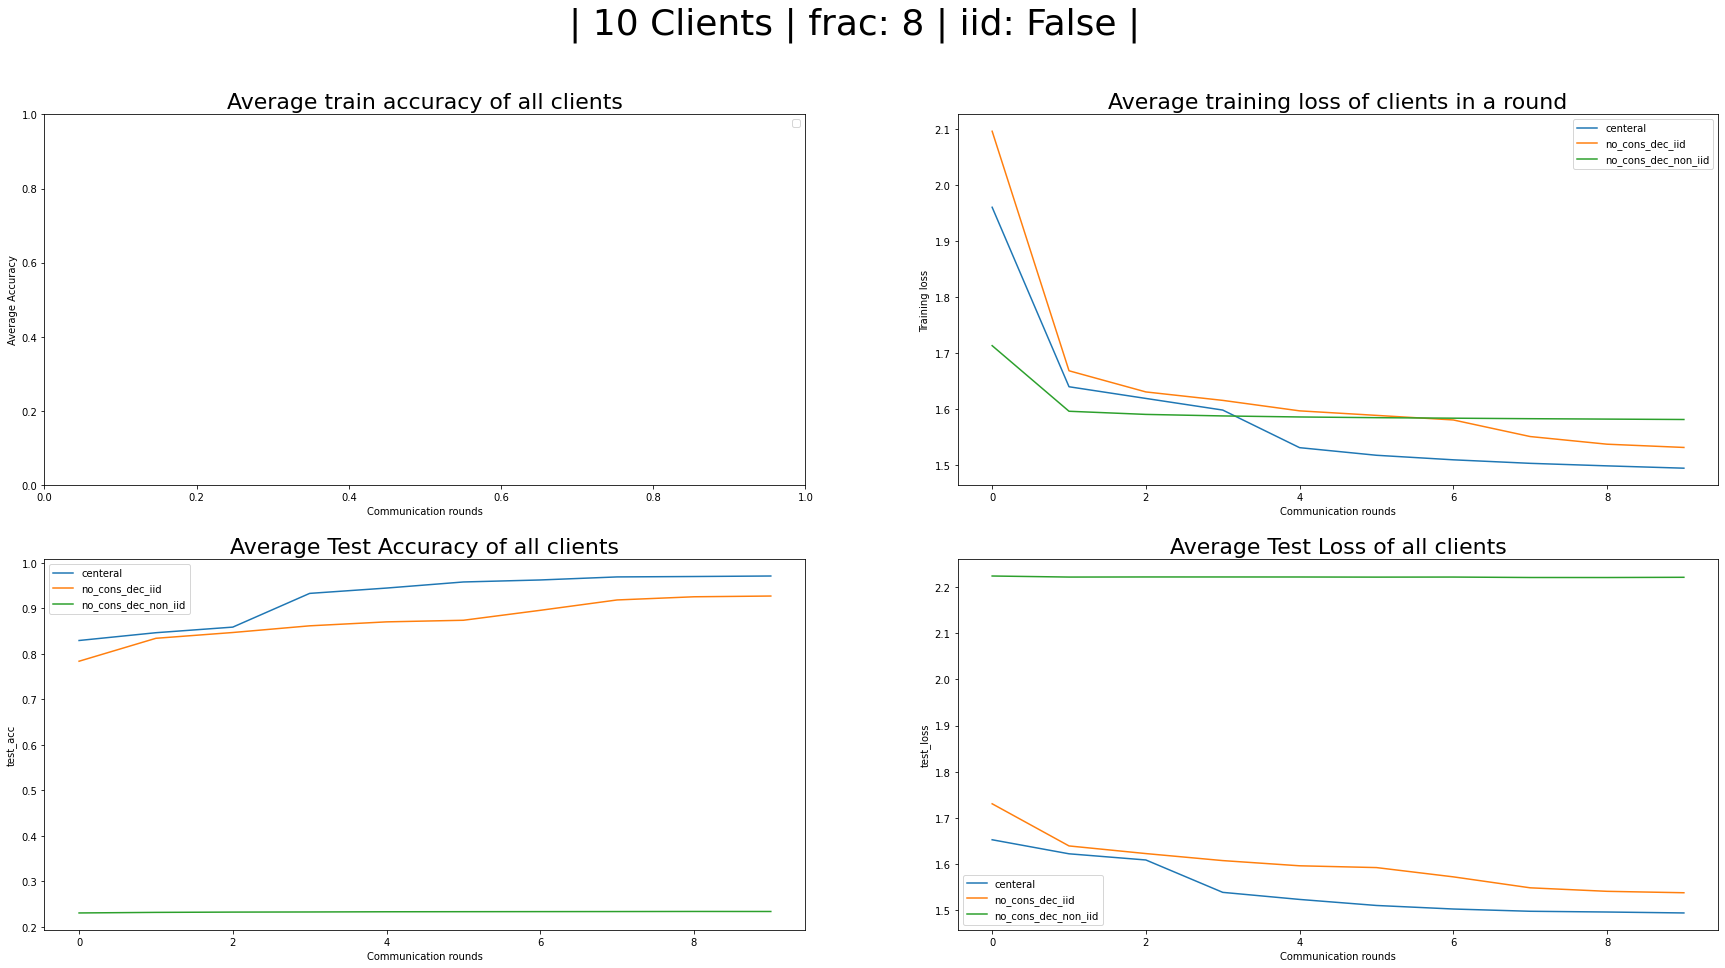

In [ ]:
servers_plot([centeral,no_cons_dec_iid,no_cons_dec_non_iid],10,8,False,["centeral","no_cons_dec_iid","no_cons_dec_non_iid"])

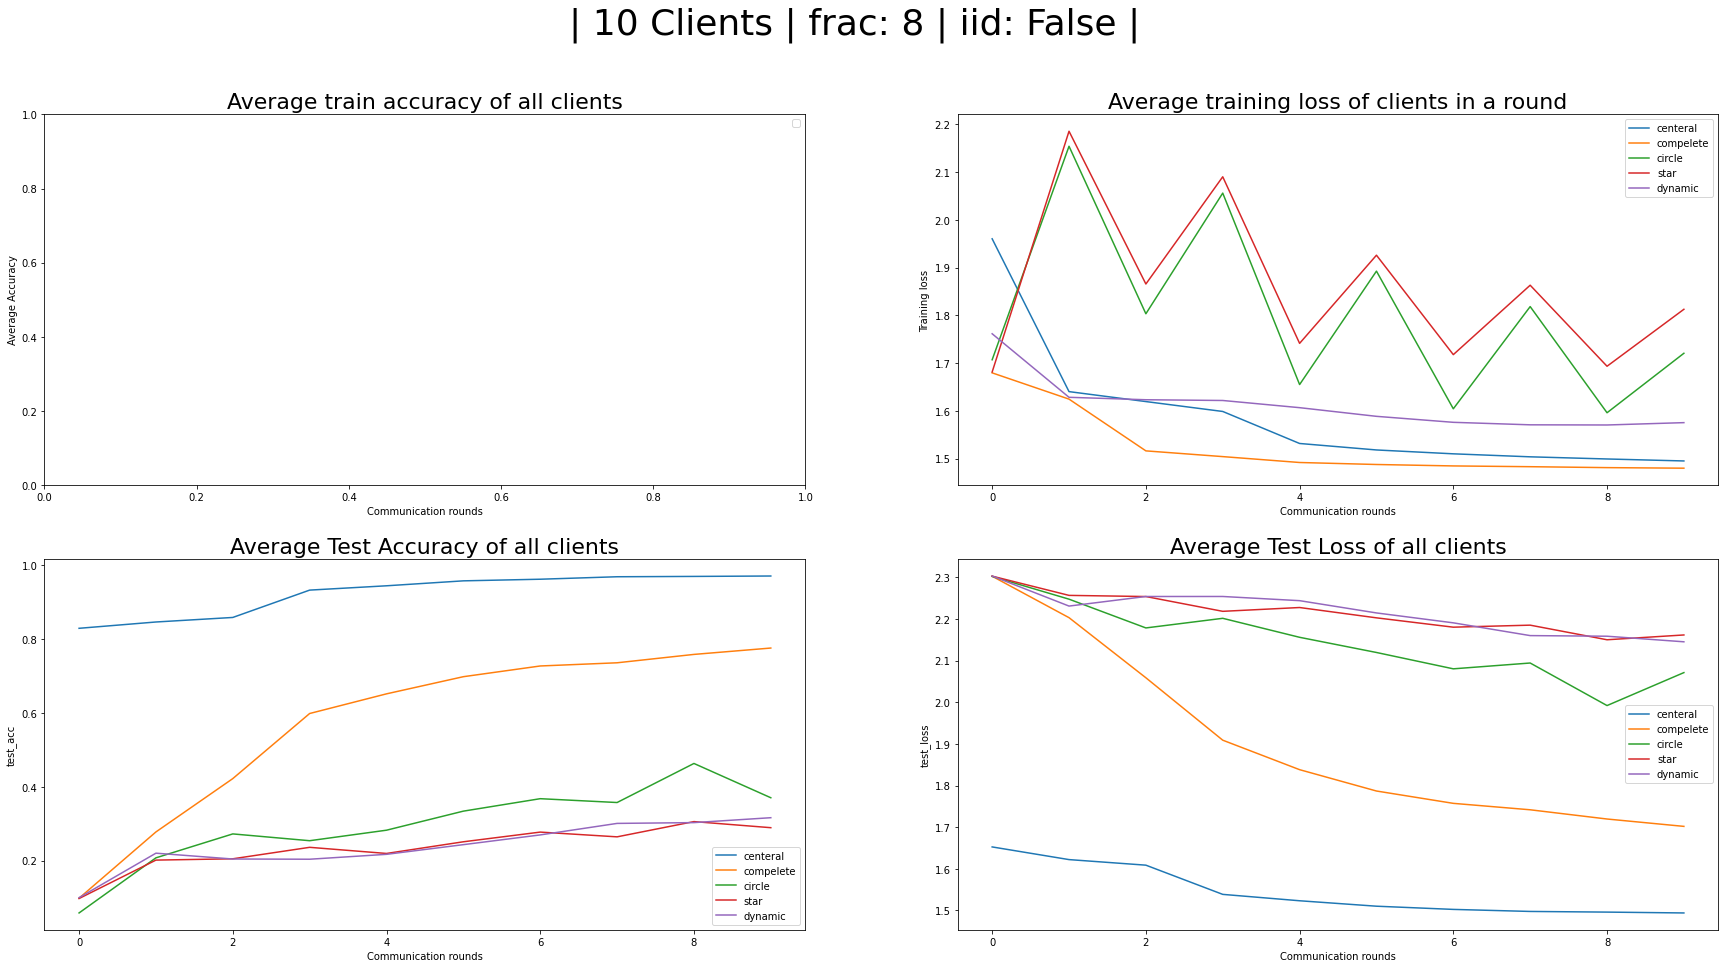

In [35]:
stoch_servers =  [centeral,dec_fed_avg_compelete_stoch_noniid     ,dec_fed_avg_circle_stoch_noniid,     dec_fed_avg_star_stoch_noniid,dec_fed_avg_dynamic_stoch_noniid]
servers_plot(stoch_servers,10,8,False,["centeral","compelete","circle","star","dynamic"])

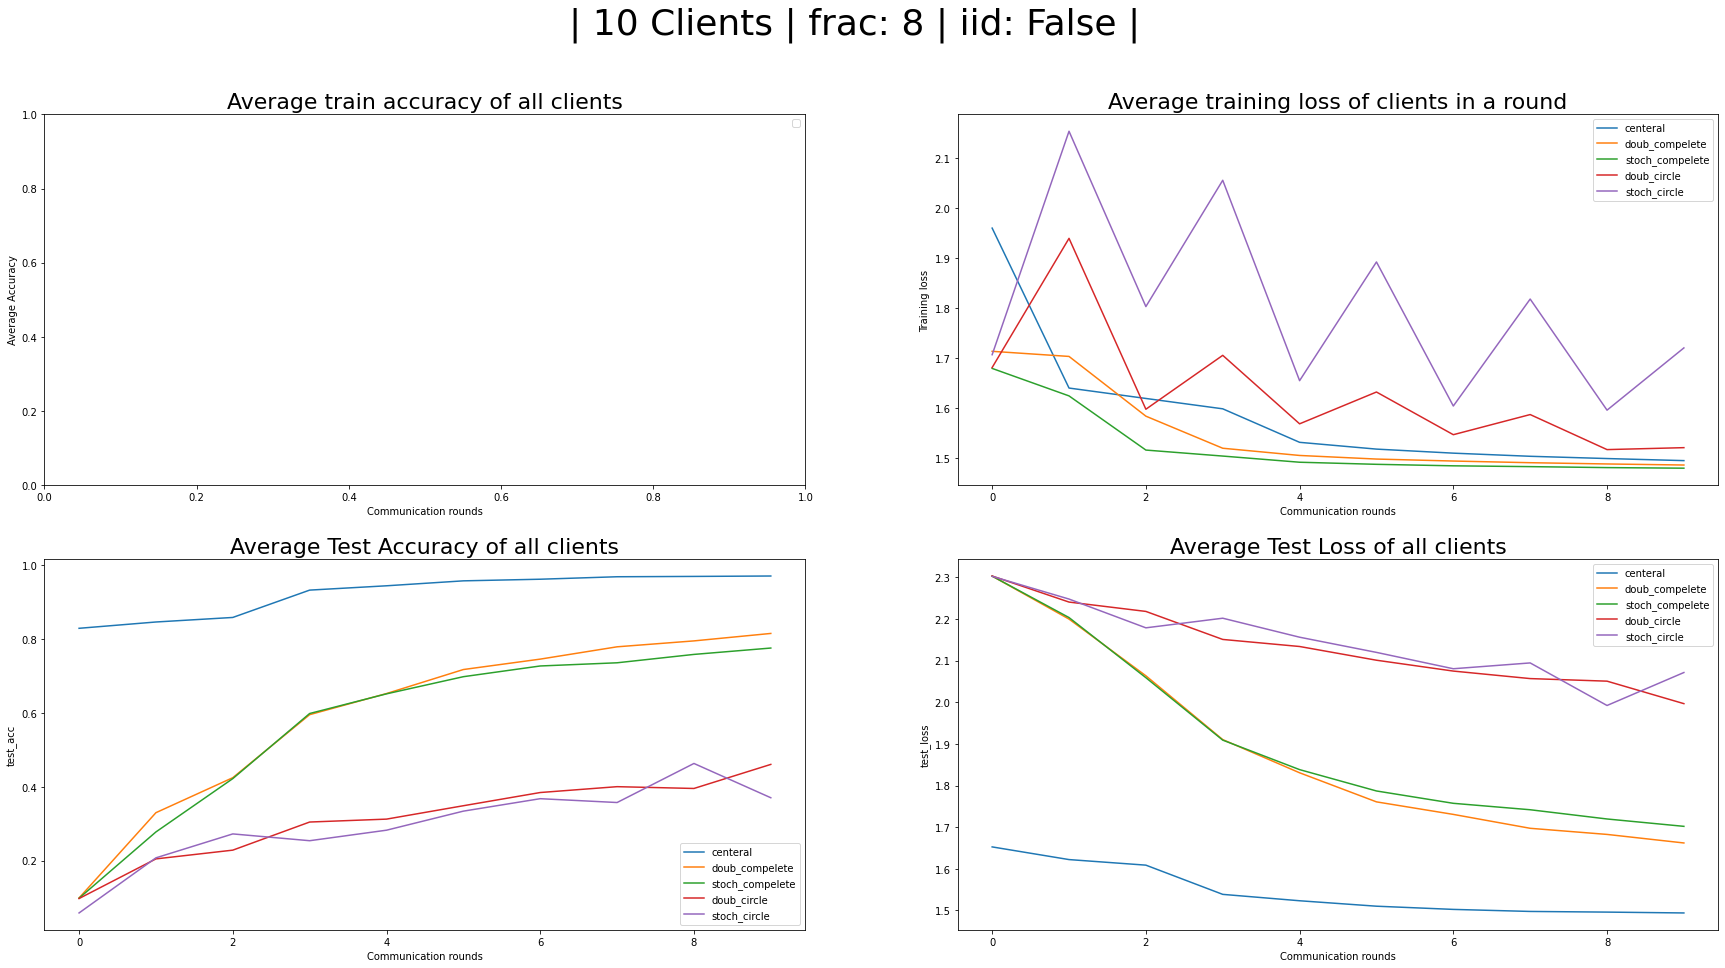

In [30]:
double_servers = [centeral,dec_fed_avg_compelete_doub_stoch_noniid,dec_fed_avg_compelete_stoch_noniid,dec_fed_avg_circle_doub_stoch_noniid,dec_fed_avg_circle_stoch_noniid]
servers_plot(double_servers,10,8,False,["centeral","doub_compelete","stoch_compelete","doub_circle","stoch_circle"])


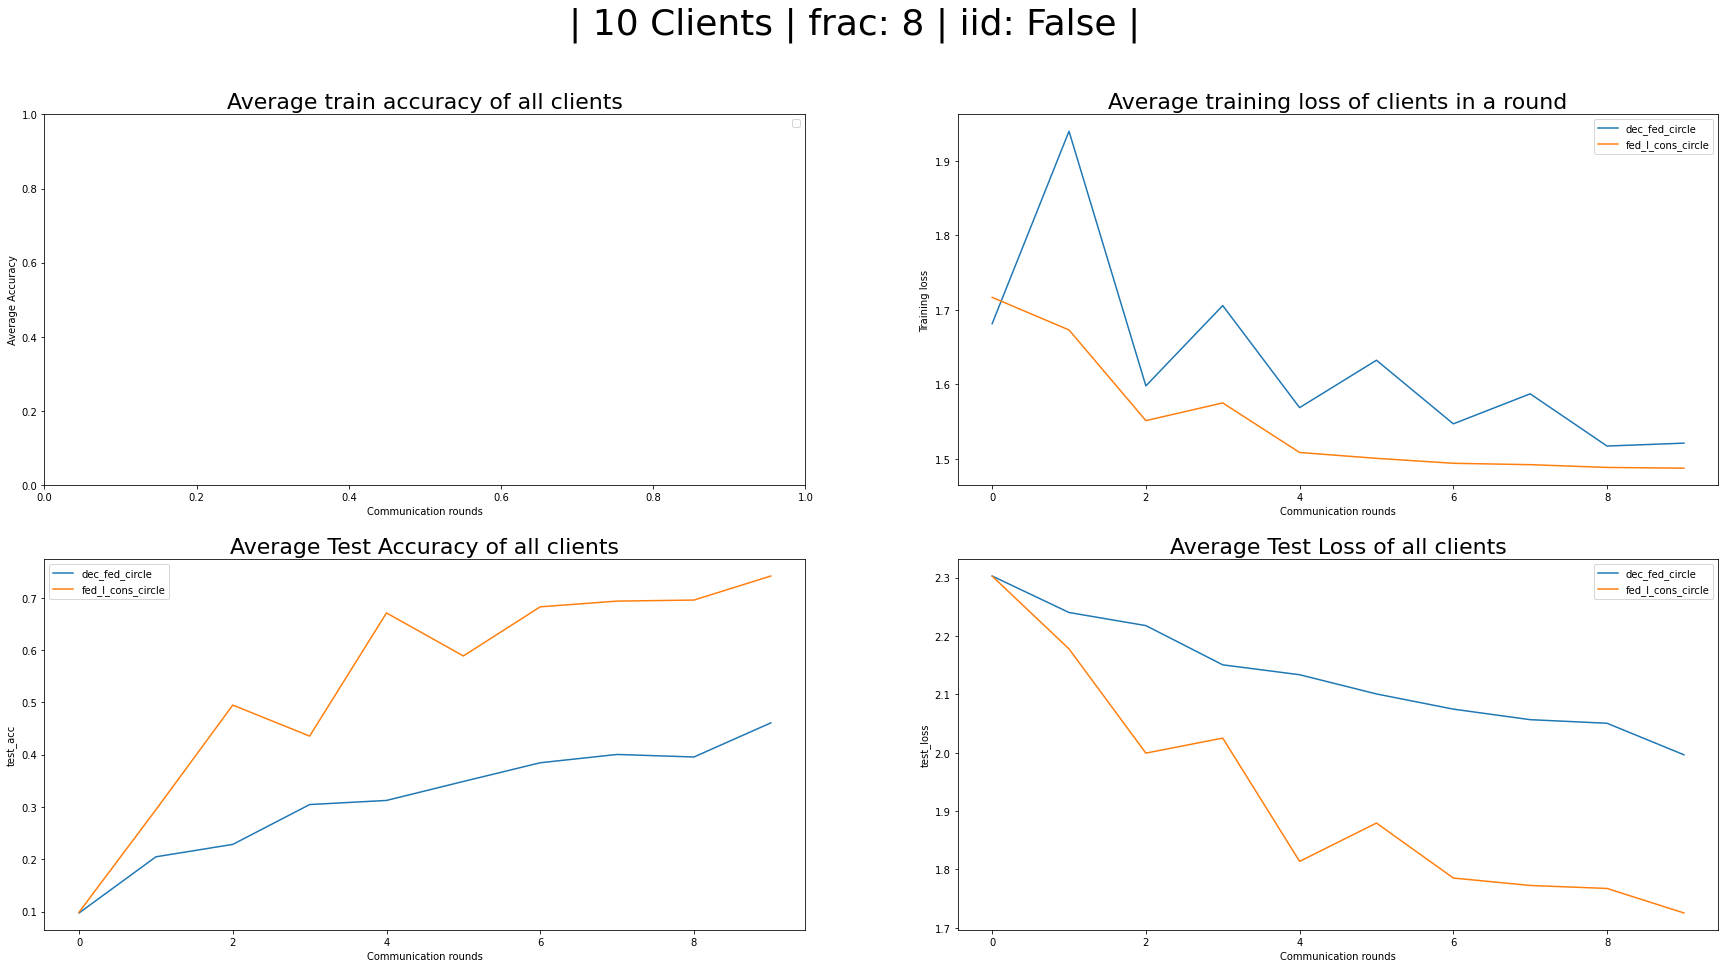

In [35]:
double_servers = [dec_fed_avg_circle_stoch_noniid,fed_l_con_dynamic_stoch_noniid]
servers_plot(double_servers,10,8,False,["dec_fed_circle","fed_l_cons_circle"])


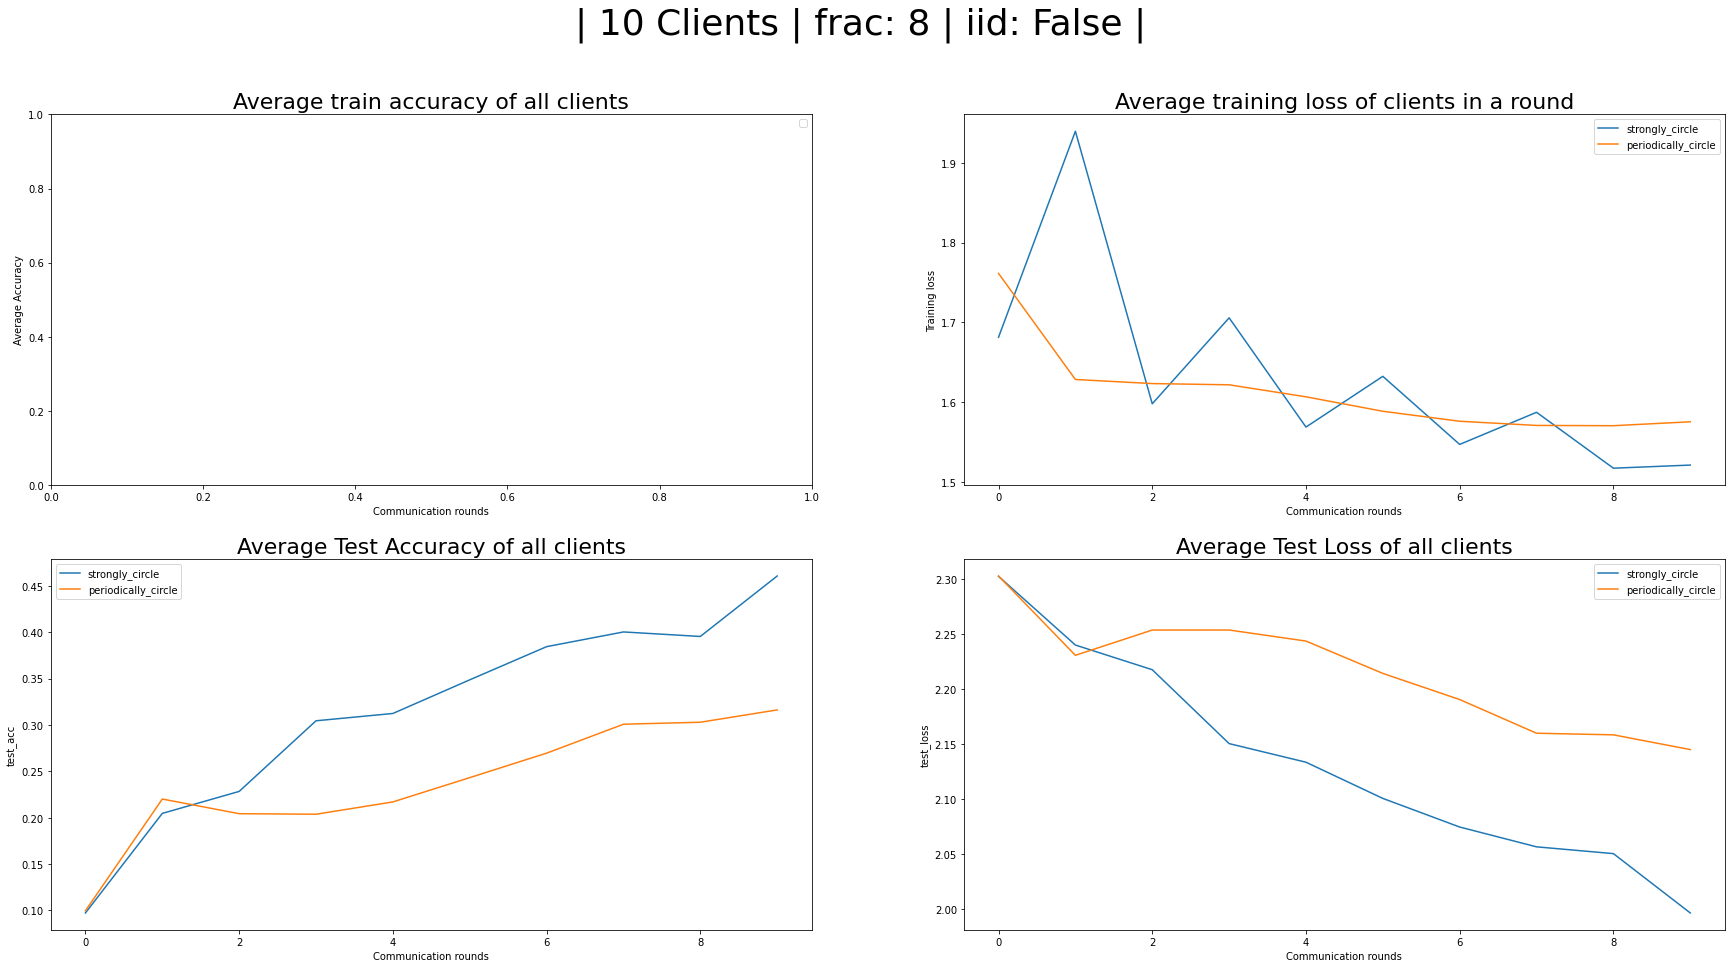

In [37]:
double_servers = [dec_fed_avg_circle_stoch_noniid,dec_fed_avg_dynamic_stoch_noniid]
servers_plot(double_servers,10,8,False,["strongly_circle","periodically_circle"])

